
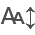

In [123]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import janitor
import matplotlib.ticker as ticker
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)



In [124]:
# Configurações para melhorar a visualização dos gráficos
plt.style.use("ggplot")  # Usando um estilo mais genérico
plt.rcParams["figure.figsize"] = (12, 8)

# Configuração adicional para melhorar a legibilidade
sns.set_context("notebook", font_scale=1.2)


#### Preenchimento/checagem dos valores dos índices e das pedras

##### INDE

O INDE (Índice de Desenvolvimento Educacional) é um índice composto que integra diversos outros indicadores para fornecer uma visão abrangente do desenvolvimento do estudante no programa da Passos Mágicos. Com base nos relatórios PEDE, vou explicar como o INDE é calculado:
Componentes do INDE:

- IDA (Índice de Desenvolvimento Acadêmico)
- IEG (Índice de Engajamento)
- IAA (Índice de Assiduidade e Adesão)
- IAN (Índice de Adequação de Nível)
- IPS (Índice Psicossocial)
- IPP (Índice de Potencial e Protagonismo)
- IPV (Índice de Presença Virtual) - adicionado a partir de 2020

- Cálculo do INDE:

- INDE relatório PEDE 2020 (p. 9):
> Fases 0 (ou alfa) a 7: (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.20)

- INDE relatório PEDE 2021 (p. 9):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

- INDE relatório PEDE 2022 (p. 8):
> Fases 0 (ou alfa) a 7: (IAN * 0.10) + (IDA * 0.20) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.10) + (IPP * 0.10) + (IPV * 0.20)
> Fase 8: (IAN * 0.10) + (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) +  (IPS * 0.20) 

##### Pedras Conceito - substituiu o CONCEITO INDE (a coluna inde_conceito por ser eliminada):

As pedras conceito são classificações atribuídas aos estudantes com base em seu desempenho geral, principalmente no INDE. Existem quatro níveis, do mais alto para o mais baixo:

- Topázio
- Ametista
- Ágata
- Quartzo

Conforme o relatório PEDE 2022 (p. 71), as faixas aproximadas de INDE para cada pedra conceito são:

- Topázio: INDE de 8,2
- Ametista: INDE de 7,0
- Ágata: INDE de 5,2
- Quartzo: INDE de 3,1



# Carrega dados pré-processados

In [125]:
df_to_process_to_process_to_process_clean_0 = pd.read_parquet(
    "data/data_clean_0.parquet"
).clean_names()
df_cleaned = (
    pd.read_parquet("data/data_pooled_0.parquet")
    .reset_index()
    .rename(columns={"index": "id"})
    .clean_names()
)


In [126]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [127]:
# simplifica a coluna nome
df_cleaned["nome"] = df_cleaned["nome"].str.replace("-", "").str.lower()


In [128]:
df_cleaned.head()


id   ano    nome instituicao_ensino_aluno  idade_aluno  anos_pm  \
0   0  2020  aluno1           Escola Pública           11        2   
1   1  2020  aluno2                     None         <NA>     <NA>   
2   2  2020  aluno3           Escola Pública           12        2   
3   3  2020  aluno4           Escola Pública           10        2   
4   4  2020  aluno5           Escola Pública           10        1   

   ponto_virada      inde inde_conceito     pedra  ... ano_ingresso bolsista  \
0           0.0  7.883752             B  Ametista  ...         <NA>      NaN   
1           NaN       NaN           NaN      None  ...         <NA>      NaN   
2           0.0  7.856390             B  Ametista  ...         <NA>      NaN   
3           0.0  5.076252             D   Quartzo  ...         <NA>      NaN   
4           0.0  8.077085             B  Ametista  ...         <NA>      NaN   

   cg  cf  ct  nota_port  nota_mat  nota_ing  qtd_aval  indicado_bolsa  
0 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
1 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
2 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
3 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  
4 NaN NaN NaN        NaN       NaN       NaN      <NA>             NaN  

[5 rows x 39 columns]

In [129]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

In [130]:
df_cleaned.reset_index().drop(["index", "id"], axis=1).to_csv(
    "data/data_cleaned.csv", index=False
)
df_cleaned_sample = df_cleaned.reset_index().drop(["index", "id"], axis=1).sample(300)
df_cleaned_sample.to_csv("data/data_cleaned_sample.csv", index=False)


In [131]:
df_cleaned_sample


ano       nome instituicao_ensino_aluno  idade_aluno  anos_pm  \
1343  2020  aluno1345                     None         <NA>     <NA>   
3659  2022   aluno964                     None         <NA>     <NA>   
2046  2021   aluno699                     None         <NA>     <NA>   
4004  2022  aluno1310                     None         <NA>     <NA>   
2661  2021  aluno1315             Rede Decisão         <NA>     <NA>   
...    ...        ...                      ...          ...      ...   
800   2020   aluno801                     None         <NA>     <NA>   
2881  2022   aluno186                     None         <NA>     <NA>   
449   2020   aluno450           Escola Pública           15        1   
832   2020   aluno833                     None         <NA>     <NA>   
1375  2021    aluno28             Rede Decisão         <NA>     <NA>   

      ponto_virada      inde inde_conceito     pedra  \
1343           NaN       NaN           NaN      None   
3659           0.0  7.720171           NaN  Ametista   
2046           NaN       NaN           NaN      None   
4004           NaN       NaN           NaN      None   
2661           0.0  5.075000           NaN   Quartzo   
...            ...       ...           ...       ...   
800            NaN       NaN           NaN      None   
2881           NaN       NaN           NaN      None   
449            0.0  6.957084             C     Ágata   
832            NaN       NaN           NaN      None   
1375           1.0  9.079000           NaN   Topázio   

                                           destaque_ieg  ... ano_ingresso  \
1343                                               <NA>  ...         <NA>   
3659    Destaque: A sua boa entrega das lições de casa.  ...         2021   
2046                                               <NA>  ...         <NA>   
4004                                               <NA>  ...         <NA>   
2661                                               <NA>  ...         <NA>   
...                                                 ...  ...          ...   
800                                                <NA>  ...         <NA>   
2881                                               <NA>  ...         <NA>   
449   Ponto a melhorar em 2021: Melhorar a sua entre...  ...         <NA>   
832                                                <NA>  ...         <NA>   
1375                                               <NA>  ...         <NA>   

     bolsista     cg    cf   ct  nota_port  nota_mat  nota_ing  qtd_aval  \
1343      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
3659      0.0  230.0  32.0  7.0   5.333333  5.666667  6.333333         4   
2046      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
4004      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
2661      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
...       ...    ...   ...  ...        ...       ...       ...       ...   
800       NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
2881      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
449       NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
832       NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   
1375      NaN    NaN   NaN  NaN        NaN       NaN       NaN      <NA>   

     indicado_bolsa  
1343            NaN  
3659            1.0  
2046            NaN  
4004            NaN  
2661            NaN  
...             ...  
800             NaN  
2881            NaN  
449             NaN  
832             NaN  
1375            NaN  

[300 rows x 38 columns]

# Carrega dados da base pura

A tabela de alunos da base não-processada `TbAluno` fornece dados sobre o sexo dos alunos e outros que não estão presentes na tabela processada

In [132]:
df_tbaluno = pd.read_csv("data/TbAluno.csv", sep=",").clean_names()
df_tbaluno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   idaluno                                 2238 non-null   int64  
 1   nomealuno                               2238 non-null   object 
 2   nomeabreviado                           0 non-null      float64
 3   idunidade                               2237 non-null   float64
 4   sexo                                    2237 non-null   object 
 5   estadocivil                             2237 non-null   float64
 6   datanascimento                          2238 non-null   object 
 7   idpai                                   800 non-null    float64
 8   idmae                                   1218 non-null   object 
 9   idresponsavel                           2237 non-null   float64
 10  idtiporesponsavel                       2238 non-null   int6

## Cria novo dataframe com as informações mais relevantes do aluno para posterior processamento

In [133]:
df_aluno = df_tbaluno[["nomealuno", "sexo", "corraca", "idtiporesponsavel"]].copy()
df_aluno.rename(columns={"corraca": "cor", "nomealuno": "nome"}, inplace=True)
df_aluno.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   nome               2238 non-null   object
 1   sexo               2237 non-null   object
 2   cor                2237 non-null   object
 3   idtiporesponsavel  2238 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 70.1+ KB


In [134]:
df_aluno["nome"] = df_aluno["nome"].str.replace(" ", "").str.lower()
df_aluno.head()


nome sexo cor  idtiporesponsavel
0  aluno1    F   R                 11
1  aluno2    F   B                 11
2  aluno3    F   B                 11
3  aluno4    M   R                 11
4  aluno5    M   R                 11

In [135]:
df_tbaluno["idtiporesponsavel"].value_counts()


idtiporesponsavel
2      1729
1       215
11      163
4        45
8        39
5        13
9         8
12        7
13        6
3         5
14        3
10        2
676       1
6         1
7         1
Name: count, dtype: int64

In [136]:
df_complete = df_aluno.set_index("nome").join(df_cleaned.set_index("nome"), how="inner")
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2275 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

## Dados empilhados

In [137]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2275 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

In [138]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "sexo",
    "cor",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_complete.columns:
        print(f"\nContagem para {var}:")
        print(df_complete[var].value_counts().sort_values())



Contagem para ano:
ano
2020    1348
2021    1348
2022    1348
Name: count, dtype: int64

Contagem para sexo:
sexo
M    1839
F    2202
Name: count, dtype: int64

Contagem para cor:
cor
N      36
A      39
P     348
R    1752
B    1866
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      394
Fase 2    472
Fase 1  

### Ajuste de dados 

In [139]:
def calc_INDE(IDA, IEG, IAA, IAN, IPS, IPP, IPV, FASE):

    if FASE == "Fase 8":
        # pg. 9 PEDE 2020
        return (IDA * 0.40) + (IEG * 0.20) + (IAA * 0.10) + (IAN * 0.10) + (IPS * 0.10)
    else:
        # pg. 9 PEDE 2020
        return (
            (IDA * 0.20)
            + (IEG * 0.20)
            + (IAA * 0.10)
            + (IAN * 0.10)
            + (IPS * 0.10)
            + (IPP * 0.10)
            + (IPV * 0.20)
        )


# df_complete[df_complete["pedra"] == "#NULO!"].apply(
#     lambda x: (
#         calc_INDE(
#             x["ida"],
#             x["ieg"],
#             x["iaa"],
#             x["ian"],
#             x["ips"],
#             x["ipp"],
#             x["ipv"],
#             x["fase"],
#         )
#     ),
#     axis=1,
# )


In [140]:
df_complete[df_complete["pedra"] == "#NULO!"]["pedra"]


nome
aluno71     #NULO!
aluno506    #NULO!
Name: pedra, dtype: object

In [141]:
df_complete.loc[["aluno71", "aluno506"], "pedra"] = "Quartzo"


In [142]:
df_complete["pedra"].value_counts()


pedra
Ametista    978
Ágata       599
Quartzo     378
Topázio     322
Name: count, dtype: int64

In [143]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  inde_conceito             727 non-null    category
 11  pedra                     2277 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   s

In [144]:
# Elimina coluna inde_conceito porque foi substituída pela coluna pedra
df_complete.drop(columns="inde_conceito", inplace=True)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4044 entries, aluno1 to aluno1349
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   sexo                      4041 non-null   object  
 1   cor                       4041 non-null   object  
 2   idtiporesponsavel         4044 non-null   int64   
 3   id                        4044 non-null   int64   
 4   ano                       4044 non-null   int64   
 5   instituicao_ensino_aluno  1413 non-null   object  
 6   idade_aluno               727 non-null    Int64   
 7   anos_pm                   727 non-null    Int64   
 8   ponto_virada              2247 non-null   float64 
 9   inde                      2273 non-null   float64 
 10  pedra                     2277 non-null   object  
 11  destaque_ieg              1589 non-null   string  
 12  destaque_ida              1589 non-null   string  
 13  destaque_ipv              1565 non-null   s

In [145]:
df_complete.columns

Index(['sexo', 'cor', 'idtiporesponsavel', 'id', 'ano',
       'instituicao_ensino_aluno', 'idade_aluno', 'anos_pm', 'ponto_virada',
       'inde', 'pedra', 'destaque_ieg', 'destaque_ida', 'destaque_ipv', 'iaa',
       'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'fase', 'turma',
       'sinalizador_ingressante', 'rec_ava_1', 'rec_ava_2', 'rec_ava_3',
       'rec_ava_4', 'defasagem', 'fase_ideal', 'ano_ingresso', 'bolsista',
       'cg', 'cf', 'ct', 'nota_port', 'nota_mat', 'nota_ing', 'qtd_aval',
       'indicado_bolsa'],
      dtype='object')

In [146]:
colunas_essenciais = ['inde', 'pedra'] + [col for col in df_complete.columns if col in ['iaa', 'ian', 'ieg', 'ips','ida', 'ipp', 'ipv']]
cols_idx = [df_complete.columns.get_loc(col) for col in colunas_essenciais]

In [147]:
# 1. Tratamento de valores nulos
df_complete = (
    df_complete.dropna(subset=df_complete.columns[cols_idx])
    .copy()
    .reset_index()
    # .drop("index", axis=1)
)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   object  
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   string

In [148]:
# 3. Converter tipos de dados
df_complete["inde"] = pd.to_numeric(df_complete["inde"], errors="coerce")
df_complete["pedra"] = df_complete["pedra"].astype("category")
for col in df_complete.columns[15:21]:
    df_complete[col] = pd.to_numeric(df_complete[col], errors="coerce")

# 4. Tratar inconsistências
# Exemplo: limitar o INDE entre 0 e 10
df_complete["inde"] = df_complete["inde"].clip(0, 10)

# 5. Criar identificador único
df_complete["id_aluno_ano"] = df_complete["nome"] + "_" + df_complete["ano"].astype(str)


In [149]:
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 non-null   string

In [150]:
df_complete.set_index("id_aluno_ano", inplace=True)
df_complete.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, aluno1_2020 to aluno1349_2022
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      2273 non-null   object  
 1   sexo                      2270 non-null   object  
 2   cor                       2270 non-null   object  
 3   idtiporesponsavel         2273 non-null   int64   
 4   id                        2273 non-null   int64   
 5   ano                       2273 non-null   int64   
 6   instituicao_ensino_aluno  1411 non-null   object  
 7   idade_aluno               727 non-null    Int64   
 8   anos_pm                   727 non-null    Int64   
 9   ponto_virada              2247 non-null   float64 
 10  inde                      2273 non-null   float64 
 11  pedra                     2273 non-null   category
 12  destaque_ieg              1589 non-null   string  
 13  destaque_ida              1589 no

In [151]:
# Lista de todos os índices que queremos verificar se há consistência entre índices
indices = ["ida", "ieg", "iaa", "ian", "ips", "ipp", "ipv"]


# Função para verificar se um valor não é nulo e não é zero
def is_valid(x):
    return pd.notnull(x)


# Criar uma máscara booleana para linhas onde todos os índices foram calculados
indices_calculados = df_complete[indices].apply(lambda x: x.apply(is_valid)).all(axis=1)

# Verificar se INDE e PEDRA também foram calculados/preenchidos para essas linhas
verificacao = (
    indices_calculados
    & df_complete["inde"].apply(is_valid)
    & df_complete["pedra"].notnull()
)

# Resultados
total_linhas = len(df_complete)
linhas_com_indices = indices_calculados.sum()
linhas_completas = verificacao.sum()

print(f"Total de linhas no DataFrame: {total_linhas}")
print(f"Linhas com todos os índices calculados: {linhas_com_indices}")
print(f"Linhas com todos os índices, INDE e PEDRA: {linhas_completas}")

if linhas_com_indices == linhas_completas:
    print("Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.")
else:
    print(
        f"Há {linhas_com_indices - linhas_completas} linhas com índices calculados, mas sem INDE ou PEDRA."
    )

# Se houver discrepâncias, vamos identificá-las
if linhas_com_indices != linhas_completas:
    discrepancias = df_complete[indices_calculados & ~verificacao]
    print("\nLinhas com discrepâncias:")
    print(discrepancias[["inde", "pedra"] + indices])

# Verificar se há alguma linha com INDE e PEDRA, mas sem todos os índices
inde_pedra_sem_indices = df_complete[
    df_complete["inde"].apply(is_valid)
    & df_complete["pedra"].notnull()
    & ~indices_calculados
]

if not inde_pedra_sem_indices.empty:
    print(
        f"\nHá {len(inde_pedra_sem_indices)} linhas com INDE e PEDRA, mas sem todos os índices calculados."
    )
    print(inde_pedra_sem_indices[["inde", "pedra"] + indices])


Total de linhas no DataFrame: 2273
Linhas com todos os índices calculados: 2273
Linhas com todos os índices, INDE e PEDRA: 2273
Todas as linhas com índices calculados também têm INDE e PEDRA preenchidos.


In [152]:
# Contagem de valores para variáveis categóricas (não-nulos)
categorical_vars = [
    "ano",
    "sexo",
    "cor",
    "instituicao_ensino_aluno",
    "inde_conceito",
    "pedra",
    "fase",
    "sinalizador_ingressante",
    "defasagem",
    "bolsista",
]
for var in categorical_vars:
    if var in df_complete.columns:
        print(f"\nContagem para {var}:")
        print(df_complete[var].value_counts().sort_values())



Contagem para ano:
ano
2021    684
2020    727
2022    862
Name: count, dtype: int64

Contagem para sexo:
sexo
M    1033
F    1237
Name: count, dtype: int64

Contagem para cor:
cor
N      20
A      25
P     199
R     970
B    1056
Name: count, dtype: int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1153
Name: count, dtype: int64

Contagem para pedra:
pedra
Topázio     322
Quartzo     374
Ágata       599
Ametista    978
Name: count, dtype: int64

Contagem para fase:
fase
Fase 8     24
Fase 6     71
Fase 7     75
Fase 5    164
Fase 4    190
Fase 3    385
ALFA      392
Fase 2    472
Fase 1    500
Name: count, dtype: int64

Contagem para sinalizador_ingressante:
sinalizador_ingressante
Ingressante    249
Veterano  

In [153]:
df_complete.describe()


idtiporesponsavel           id          ano  idade_aluno   anos_pm  \
count        2273.000000  2273.000000  2273.000000        727.0     727.0   
mean            4.087549   669.717994  2021.059393    12.408528  1.467675   
std            24.628039   386.166327     0.834179     2.829807  1.131195   
min             1.000000     0.000000  2020.000000          7.0       0.0   
25%             2.000000   338.000000  2020.000000         10.0       1.0   
50%             2.000000   676.000000  2021.000000         12.0       1.0   
75%             2.000000  1000.000000  2022.000000         14.0       2.0   
max           676.000000  1348.000000  2022.000000         20.0       4.0   

       ponto_virada         inde          iaa          ieg          ips  ...  \
count   2247.000000  2273.000000  2273.000000  2273.000000  2273.000000  ...   
mean       0.140187     7.071757     8.264602     7.504482     6.833073  ...   
std        0.347258     1.200129     2.012817     2.195622     1.295848  ...   
min        0.000000     2.468000     0.000000     0.000000     0.000000  ...   
25%        0.000000     6.399377     7.916670     6.300000     6.250000  ...   
50%        0.000000     7.282096     8.750010     8.100000     7.500000  ...   
75%        0.000000     7.940281     9.500000     9.200000     7.500000  ...   
max        1.000000     9.712504    10.000020    10.000000    10.000000  ...   

       ano_ingresso   bolsista          cg          cf          ct  \
count         862.0  862.00000  862.000000  862.000000  862.000000   
mean     2020.49652    0.12529  431.500000   75.396752    6.617169   
std        1.787649    0.33124  248.982262   52.314184    3.989485   
min          2016.0    0.00000    1.000000    1.000000    1.000000   
25%          2019.0    0.00000  216.250000   30.000000    3.000000   
50%          2021.0    0.00000  431.500000   66.500000    6.000000   
75%          2022.0    0.00000  646.750000  118.000000    9.750000   
max          2022.0    1.00000  862.000000  192.000000   18.000000   

        nota_port    nota_mat    nota_ing  qtd_aval  indicado_bolsa  
count  860.000000  860.000000  285.000000     862.0      862.000000  
mean     5.796318    6.306628    5.839942  3.056845        0.153132  
std      2.422292    2.092551    2.992093  0.775806        0.360324  
min      0.000000    0.000000    0.000000       2.0        0.000000  
25%      4.316667    5.166667    3.500000       2.0        0.000000  
50%      6.000000    6.650000    6.266667       3.0        0.000000  
75%      7.833333    7.833333    8.500000       4.0        0.000000  
max     10.000000   10.000000   10.000000       4.0        1.000000  

[8 rows x 25 columns]

A contagem dos dados mostra que as classes estão desbalanceadas ou ainda contêm valores sem sentido. 

df_complete.iloc[69]

<Axes: ylabel='Frequency'>

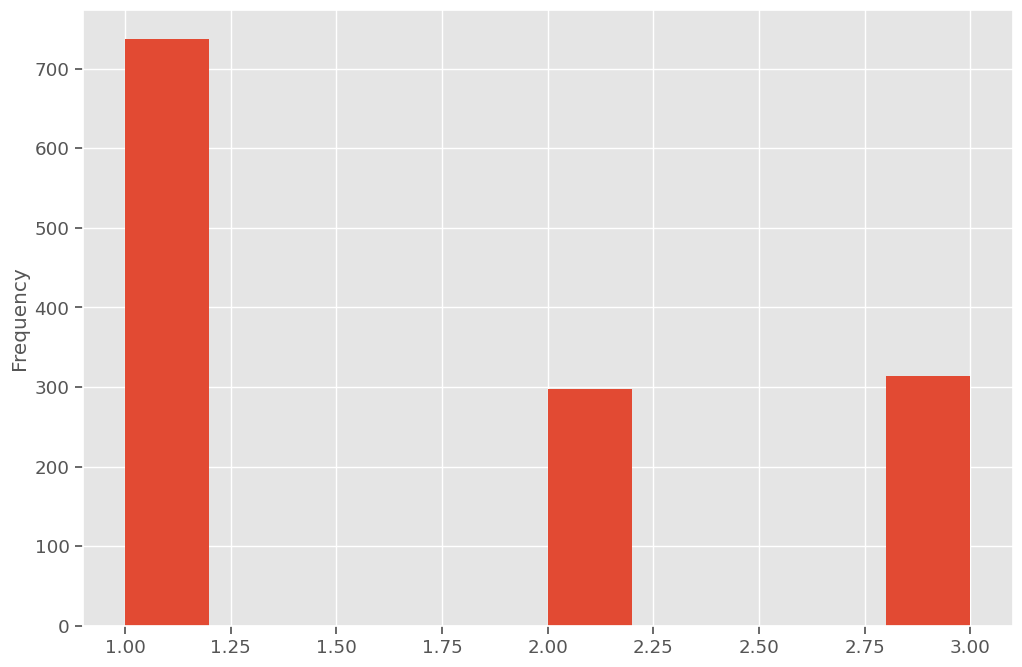

In [154]:
df_complete.groupby("nome")["nome"].count().sort_values(ascending=False).plot(
    kind="hist"
)


#### A partir da coluna `INSTITUICAO_ENSINO_ALUNO` é gerada uma nova coluna `CATEGORIA_INSTITUICAO`

In [155]:
def categorizar_instituicao(instituicao):
    if pd.isna(instituicao):
        return None
    elif instituicao == "Escola Pública":
        return "Escola Pública"
    elif instituicao in ["FIAP", "UNISA", "Estácio"]:
        return "Ensino Superior Privado"
    else:
        return "Escolas Privadas"


# Criar nova coluna com as categorias
df_complete["categoria_instituicao"] = df_complete["instituicao_ensino_aluno"].apply(
    categorizar_instituicao
)

# Verificar o resultado
print(df_complete["categoria_instituicao"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de instituição:")
print(df_complete["categoria_instituicao"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(
    pd.crosstab(
        df_complete["instituicao_ensino_aluno"], df_complete["categoria_instituicao"]
    )
)


categoria_instituicao
Escola Pública             1153
Escolas Privadas            234
Ensino Superior Privado      24
Name: count, dtype: int64

Distribuição percentual por categoria de instituição:
categoria_instituicao
Escola Pública             81.715096
Escolas Privadas           16.583983
Ensino Superior Privado     1.700921
Name: proportion, dtype: float64
categoria_instituicao     Ensino Superior Privado  Escola Pública  \
instituicao_ensino_aluno                                            
Einstein                                        0               0   
Escola JP II                                    0               0   
Escola João Paulo II                            0               0   
Escola Pública                                  0            1153   
Estácio                                         3               0   
FIAP                                           11               0   
Rede Decisão                                    0               0   
Rede Decisão/U

#### Corrige a coluna `PEDRA`

In [156]:
def categorizar_pedra(pedra):
    if pd.isna(pedra):
        return None
    else:
        return pedra


df_complete["categoria_pedra"] = df_complete["pedra"].apply(categorizar_pedra)

# Verificar o resultado
print(df_complete["categoria_pedra"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de pedra:")
print(df_complete["categoria_pedra"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta (tabulação cruzada)
print(pd.crosstab(df_complete["pedra"], df_complete["categoria_pedra"]))


categoria_pedra
Ametista    978
Ágata       599
Quartzo     374
Topázio     322
Name: count, dtype: int64

Distribuição percentual por categoria de pedra:
categoria_pedra
Ametista    43.026837
Ágata       26.352838
Quartzo     16.454026
Topázio     14.166300
Name: proportion, dtype: float64
categoria_pedra  Ametista  Quartzo  Topázio  Ágata
pedra                                             
Ametista              978        0        0      0
Quartzo                 0      374        0      0
Topázio                 0        0      322      0
Ágata                   0        0        0    599


#### Criar a nova coluna `CATEGORIA_DEFASAGEM` a partir de `DEFASAGEM` para melhor balancear os dados 

In [157]:
def categorizar_defasagem(defasagem):
    if pd.isna(defasagem):
        return None
    elif defasagem >= 0:
        return ">=0.0"
    elif defasagem == -1:
        return "-1.0"
    else:
        return "<=-2.0"


# Converter a coluna DEFASAGEM para numérica, caso não esteja
df_complete["defasagem"] = pd.to_numeric(df_complete["defasagem"], errors="coerce")

# Criar nova coluna com as categorias
df_complete["categoria_defasagem"] = df_complete["defasagem"].apply(
    categorizar_defasagem
)

# Verificar o resultado
print("Contagem por categoria de defasagem:")
print(df_complete["categoria_defasagem"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_complete["categoria_defasagem"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:")
print(pd.crosstab(df_complete["defasagem"], df_complete["categoria_defasagem"]))


Contagem por categoria de defasagem:
categoria_defasagem
-1.0      317
>=0.0     265
<=-2.0    102
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_defasagem
-1.0      46.345029
>=0.0     38.742690
<=-2.0    14.912281
Name: proportion, dtype: float64

Tabulação cruzada de DEFASAGEM vs CATEGORIA_DEFASAGEM:
categoria_defasagem  -1.0  <=-2.0  >=0.0
defasagem                               
-4.0                    0       2      0
-3.0                    0       8      0
-2.0                    0      92      0
-1.0                  317       0      0
 0.0                    0       0    248
 1.0                    0       0     16
 3.0                    0       0      1


#### Cria a coluna `CATEGORIA_BOLSISTA` a partir da coluna `BOLSISTA` para fins de padronização e melhor representação nos gráficos

In [158]:
def categorizar_bolsista(bolsista):
    if pd.isna(bolsista):
        return None
    elif bolsista == 1.0:
        return "Sim"
    else:
        return "Não"


df_complete["categoria_bolsista"] = df_complete["bolsista"].apply(categorizar_bolsista)

# Verificar o resultado
print("Contagem por categoria de bolsista:")
print(df_complete["categoria_bolsista"].value_counts())

# Se quiser ver a distribuição percentual
print("\nDistribuição percentual por categoria de defasagem:")
print(df_complete["categoria_bolsista"].value_counts(normalize=True) * 100)

# Para verificar se a categorização está correta, você pode fazer uma tabulação cruzada
print("\nTabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:")
print(pd.crosstab(df_complete["bolsista"], df_complete["categoria_bolsista"]))


Contagem por categoria de bolsista:
categoria_bolsista
Não    754
Sim    108
Name: count, dtype: int64

Distribuição percentual por categoria de defasagem:
categoria_bolsista
Não    87.470998
Sim    12.529002
Name: proportion, dtype: float64

Tabulação cruzada de BOLSISTA vs CATEGORIA_BOLSISTA:
categoria_bolsista  Não  Sim
bolsista                    
0.0                 754    0
1.0                   0  108


#### Visão dos dados até o momento

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas:

In [159]:
print(f"Total de linhas: {len(df_complete)}")
pd.DataFrame(
    {
        "Total": df_complete.isnull().sum(),
        "Percentual": df_complete.isnull().sum() / len(df_complete) * 100,
    }
)


Total de linhas: 2273


Total  Percentual
nome                          0    0.000000
sexo                          3    0.131984
cor                           3    0.131984
idtiporesponsavel             0    0.000000
id                            0    0.000000
ano                           0    0.000000
instituicao_ensino_aluno    862   37.923449
idade_aluno                1546   68.015838
anos_pm                    1546   68.015838
ponto_virada                 26    1.143863
inde                          0    0.000000
pedra                         0    0.000000
destaque_ieg                684   30.092389
destaque_ida                684   30.092389
destaque_ipv                708   31.148262
iaa                           0    0.000000
ieg                           0    0.000000
ips                           0    0.000000
ida                           0    0.000000
ipp                           0    0.000000
ipv                           0    0.000000
ian                           0    0.000000
fase                          0    0.000000
turma                         0    0.000000
sinalizador_ingressante    1589   69.907611
rec_ava_1                   727   31.984162
rec_ava_2                   727   31.984162
rec_ava_3                   963   42.366916
rec_ava_4                  1304   57.369116
defasagem                  1589   69.907611
fase_ideal                  729   32.072151
ano_ingresso               1411   62.076551
bolsista                   1411   62.076551
cg                         1411   62.076551
cf                         1411   62.076551
ct                         1411   62.076551
nota_port                  1413   62.164540
nota_mat                   1413   62.164540
nota_ing                   1988   87.461505
qtd_aval                   1411   62.076551
indicado_bolsa             1411   62.076551
categoria_instituicao       862   37.923449
categoria_pedra               0    0.000000
categoria_defasagem        1589   69.907611
categoria_bolsista         1411   62.076551

Existe uma quantidade substancial de dados ausentes `NA` (e também `"ND"`) em todas as colunas

# Visão geral de alguns indicadores ao longo dos anos (por sexo)

In [160]:
# funções auxiliares
def teste_t(df, indicador, categoria):
    from itertools import permutations

    categorias = permutations(df[categoria].unique().dropna(), 2)

    for i in categorias:
        categoria_i = df[df[categoria] == i[0]][indicador]
        categoria_j = df[df[categoria] == i[1]][indicador]

        t_stat, p_value = stats.ttest_ind(categoria_i, categoria_j)

        if p_value <= 0.05:
            print(f"Resultado do teste t para:")
            print(f"t-statistic: {t_stat:.2f}")
            print(f"p-value: {p_value:.4f}")
            print(f"Categorias:{i} => Diferença é estatisticamente significativa.\n")


## INDE - por ano e por gênero

Text(0.5, 1.0, 'Distribuição do INDE por ano e por sexo')

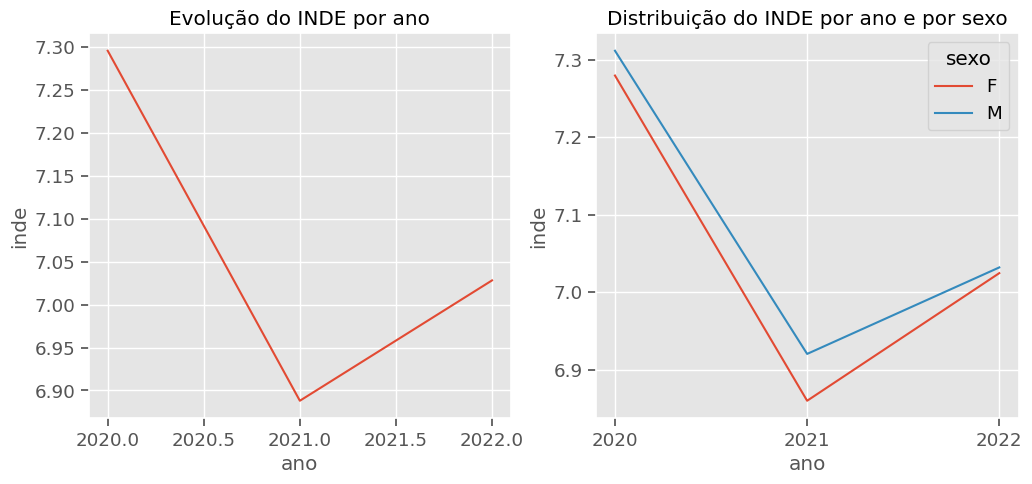

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

inde_by_year = df_complete.groupby("ano")["inde"].mean().reset_index()
inde_by_year_gender = df_complete.groupby(["ano", "sexo"])["inde"].mean().reset_index()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

sns.lineplot(data=inde_by_year, x="ano", y="inde", ax=axes[0])
axes[0].set_title("Evolução do INDE por ano")

sns.lineplot(data=inde_by_year_gender, x="ano", y="inde", hue="sexo", ax=axes[1])
axes[1].set_title("Distribuição do INDE por ano e por sexo")


### Verifica a normalidade dos dados

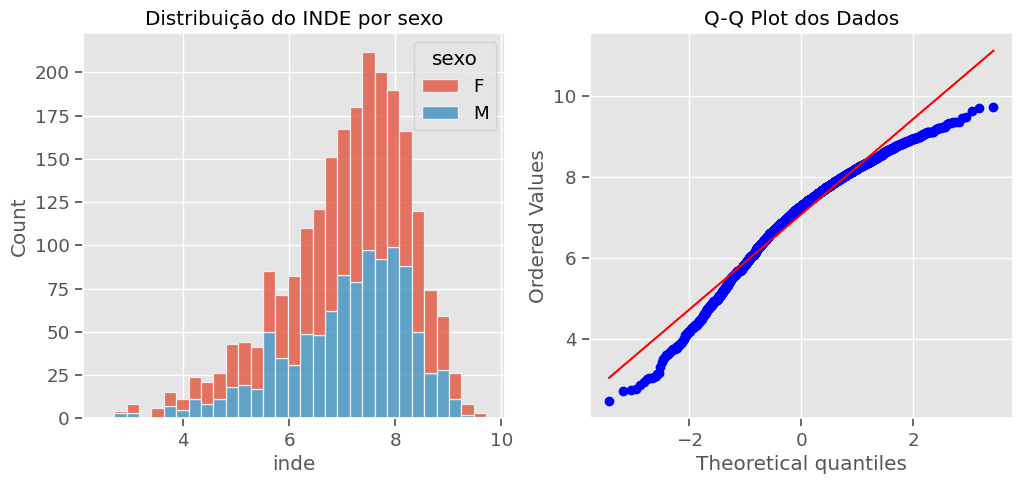

In [162]:
# Verifica a normalidade dos dados

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

# Gráfico com seaborn
sns.histplot(data=df_complete, x="inde", hue="sexo", multiple="stack", ax=axes[0])
axes[0].set_title("Distribuição do INDE por sexo")

# Gráfico com matplotlib
plt.sca(axes[1])
stats.probplot(df_complete["inde"], dist="norm", plot=plt)
axes[1].set_title("Q-Q Plot dos Dados")

# Mostrar a figura
plt.show()


#### Teste Mann-Whitney U 

 Comparar dois grupos (neste caso, sexo masculino e feminino) quando os dados não seguem uma distribuição normal.

In [163]:
import scipy.stats as stats

# Separando os dados por sexo
male_inde = df_complete[df_complete["sexo"] == "M"]["inde"]
female_inde = df_complete[df_complete["sexo"] == "F"]["inde"]

# Realizando o teste de Mann-Whitney U
u_statistic, p_value = stats.mannwhitneyu(male_inde, female_inde)

print(f"U-Statistic: {u_statistic}, p-value: {p_value}")


U-Statistic: 650862.0, p-value: 0.44218238406237553


Interpretação: Se o valor p (p_value) for menor que um nível de significância (comum é 0,05), você pode rejeitar a hipótese nula e concluir que existe uma diferença estatisticamente significativa entre os valores de inde para os diferentes sexos.


#### Teste de Kruskal-Wallis

 Comparar mais de dois grupos (neste caso, os anos de 2020, 2021 e 2022) quando os dados não seguem uma distribuição normal.

In [164]:
# Separando os dados por ano
inde_2020 = df_complete[df_complete["ano"] == 2020]["inde"]
inde_2021 = df_complete[df_complete["ano"] == 2021]["inde"]
inde_2022 = df_complete[df_complete["ano"] == 2022]["inde"]

# Realizando o teste de Kruskal-Wallis
h_statistic, p_value = stats.kruskal(inde_2020, inde_2021, inde_2022)

print(f"H-Statistic: {h_statistic}, p-value: {p_value}")


H-Statistic: 47.25395906912189, p-value: 5.48192594138268e-11


Interpretação: Assim como no teste anterior, se o valor p (p_value) for menor que o nível de significância (geralmente 0,05), você pode concluir que existe uma diferença estatisticamente significativa entre os anos analisados.

#### Teste de Dunn

Se o teste de Kruskal-Wallis indicar uma diferença significativa, você pode querer identificar especificamente quais pares de anos diferem. Para isso, você pode usar o Teste de Dunn com correção de Bonferroni para múltiplas comparações.

In [166]:
import scikit_posthocs as sp

# Realizando o teste de Dunn
dunn_result = sp.posthoc_dunn([inde_2020, inde_2021, inde_2022], p_adjust="bonferroni")

print(dunn_result)


              1             2             3
1  1.000000e+00  2.597729e-09  1.858829e-08
2  2.597729e-09  1.000000e+00  1.000000e+00
3  1.858829e-08  1.000000e+00  1.000000e+00


Interpretação: A matriz resultante mostrará os valores p para cada par de comparações. Se um valor p for menor que 0,05 após a correção de Bonferroni, esse par de anos tem uma diferença significativa no indicador inde.

#### Teste Mann-Whitney U 

Comparação entre genêros para cada ano


In [167]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 1. Comparação entre sexos para cada ano
years = [2020, 2021, 2022]

for year in years:
    male_data = df_complete[
        (df_complete["ano"] == year) & (df_complete["sexo"] == "M")
    ]["inde"]
    female_data = df_complete[
        (df_complete["ano"] == year) & (df_complete["sexo"] == "F")
    ]["inde"]

    statistic, p_value = stats.mannwhitneyu(
        male_data, female_data, alternative="two-sided"
    )

    print(f"Ano {year}:")
    print(f"Estatística do teste Mann-Whitney U: {statistic}")
    print(f"Valor p: {p_value}")
    print(
        "Diferença estatisticamente significativa"
        if p_value < 0.05
        else "Diferença não significativa"
    )
    print()


Ano 2020:
Estatística do teste Mann-Whitney U: 65534.0
Valor p: 0.9633813747188757
Diferença não significativa

Ano 2021:
Estatística do teste Mann-Whitney U: 59497.0
Valor p: 0.5124840792362517
Diferença não significativa

Ano 2022:
Estatística do teste Mann-Whitney U: 92481.0
Valor p: 0.7740545930259126
Diferença não significativa



Interpretação do p-valor
p-valor alto (geralmente > 0,05):

Interpretação: Você não rejeita a hipótese nula. Isso sugere que não há evidências suficientes para concluir que os dados não seguem uma distribuição normal. Em outras palavras, os dados podem ser considerados normalmente distribuídos.
Exemplo: Se o p-valor é 0,12, você não rejeita a hipótese nula e pode supor que os dados seguem uma distribuição normal.
p-valor baixo (geralmente ≤ 0,05):

Interpretação: Você rejeita a hipótese nula. Isso sugere que há evidências suficientes para concluir que os dados não seguem uma distribuição normal. Portanto, os dados não são normalmente distribuídos.
Exemplo: Se o p-valor é 0,03, você rejeita a hipótese nula e conclui que os dados provavelmente não seguem uma distribuição normal.

#### Conclusão dos testes

- Não existe diferença estatisticamente significativa no INDE de acordo com o gênero dos alunos, tanto no agregado, quanto entre os anos;
- Existe diferença estatisticamente significativa no INDE quando se compara 2020 com 2021 ou 2022, porém não há diferença estatisticamente significativa entre 2021 e 2022

## Pedras

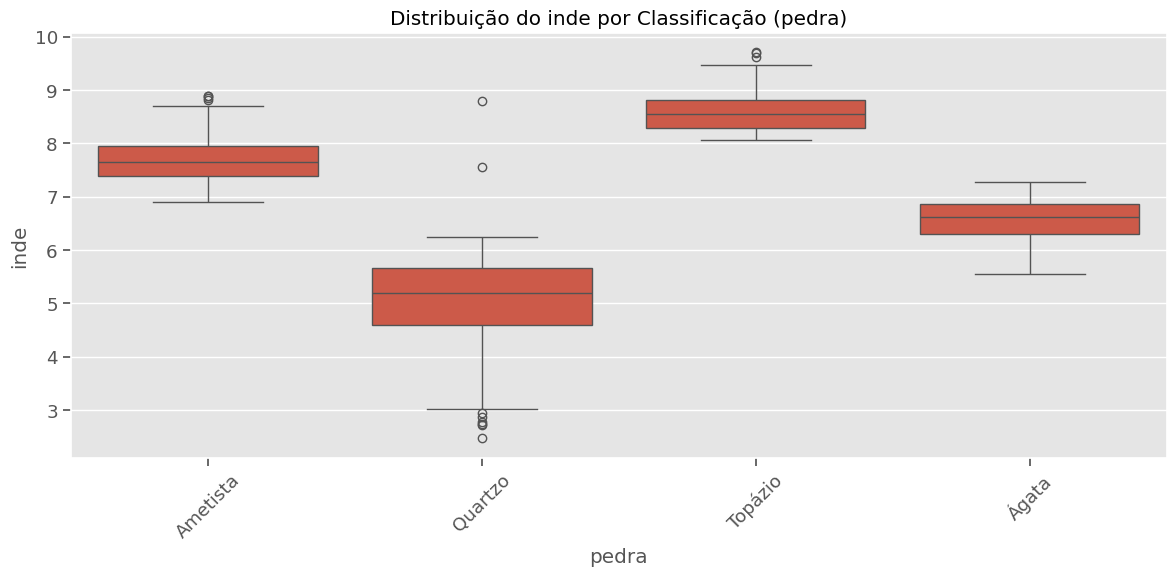

In [168]:
# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pedra", y="inde", data=df_complete)
plt.title("Distribuição do inde por Classificação (pedra)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


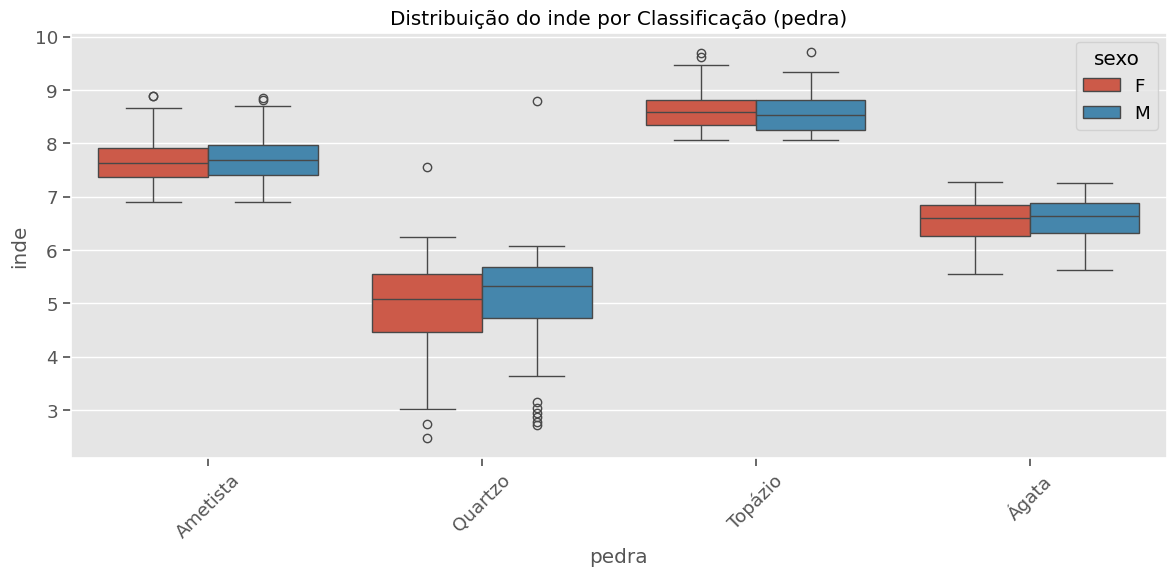

In [169]:
# Criando o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="pedra", y="inde", data=df_complete, hue="sexo")
plt.title("Distribuição do inde por Classificação (pedra)")
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar cortes nos rótulos
plt.show()


### Todos os indicadores numéricos

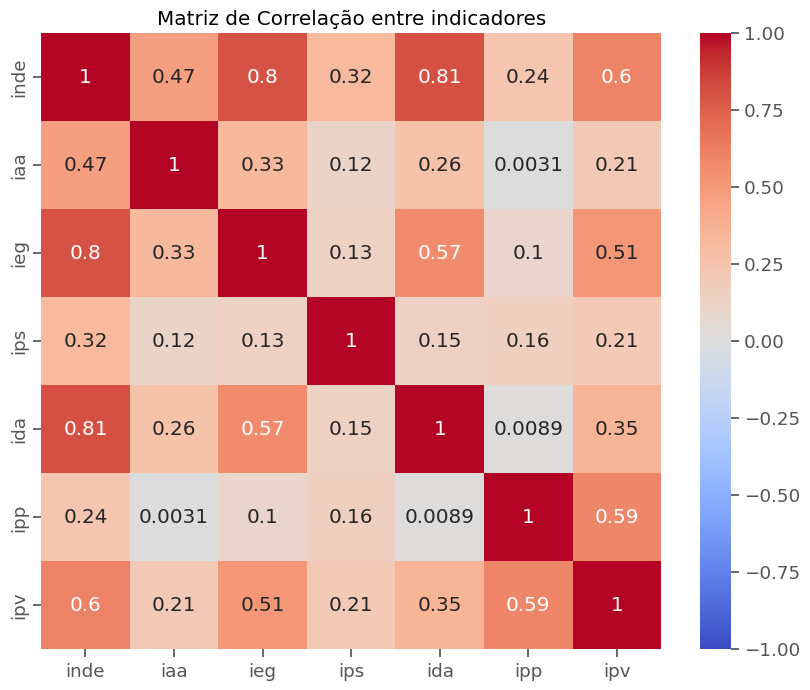

In [200]:
# Heatmap de correlação entre variáveis numéricas
numeric_vars = ["inde", "iaa", "ieg", "ips", "ida", "ipp", "ipv"]
corr_matrix = df_complete[numeric_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Matriz de Correlação entre indicadores")
plt.show()


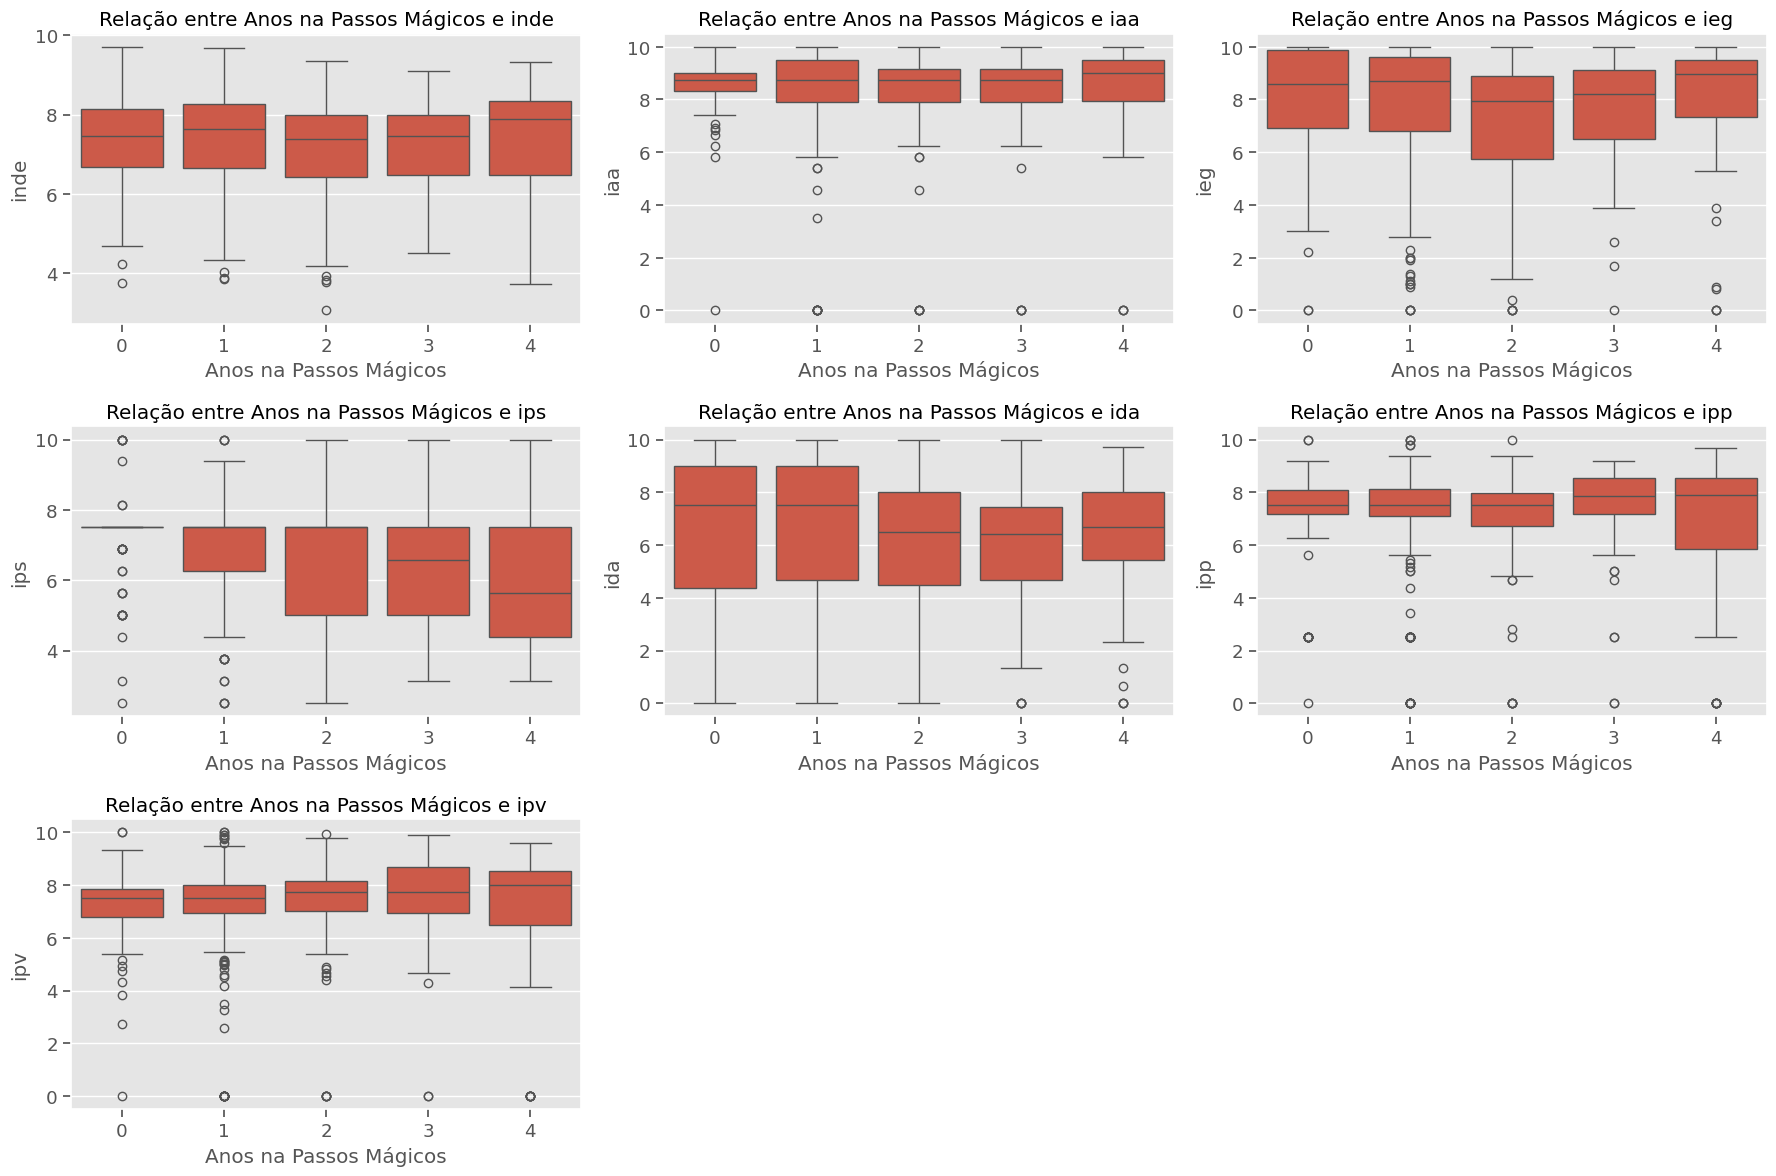

In [201]:
# plot the boxplot for each indicator and anos_pm side by side
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

for i, ax in enumerate(axes.flat):
    if i < len(numeric_vars):
        sns.boxplot(x="anos_pm", y=numeric_vars[i], data=df_complete, ax=ax)
        ax.set_title(f"Relação entre Anos na Passos Mágicos e {numeric_vars[i]}")
        ax.set_xlabel("Anos na Passos Mágicos")
        ax.set_ylabel(numeric_vars[i])
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


In [207]:
# Testar a normalidade dos indicadores
normality_results = []

for var in numeric_vars:
    # Realizar o teste de Shapiro-Wilk
    statistic, p_value = stats.shapiro(df_complete[var].dropna())
    
    # Armazenar os resultados
    normality_results.append({
        'Variable': var,
        'Statistic': statistic,
        'P-value': p_value,
        'Is Normal': p_value > 0.05
    })

# Criar um DataFrame com os resultados
normality_df = pd.DataFrame(normality_results)

# Formatar o DataFrame para exibição
normality_df['Statistic'] = normality_df['Statistic'].round(4)
normality_df['P-value'] = normality_df['P-value'].round(4)

# Exibir o DataFrame
display(normality_df.style
        .set_caption("Teste de Normalidade (Shapiro-Wilk)")
        .applymap(lambda x: 'background-color: lightgreen' if x else 'background-color: lightsalmon', subset=['Is Normal'])
        .set_properties(**{'text-align': 'center'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]))


Variable,Statistic,P-value,Is Normal
inde,0.960800,0.000000,False
iaa,0.635100,0.000000,False
ieg,0.894200,0.000000,False
ips,0.743700,0.000000,False
ida,0.960100,0.000000,False
ipp,0.870800,0.000000,False
ipv,0.890000,0.000000,False


In [202]:
# Os dados não são normalmente distribuídos, então:
# Perform Mann-Whitney U test for each year against the list numeric_vars
years = df_complete['ano'].unique()
results = {}

for year in years:
    year_data = df_complete[df_complete['ano'] == year]
    other_years_data = df_complete[df_complete['ano'] != year]
    
    year_results = {}
    for var in numeric_vars:
        statistic, p_value = stats.mannwhitneyu(year_data[var].dropna(), other_years_data[var].dropna(), alternative='two-sided')
        year_results[var] = {'statistic': statistic, 'p_value': p_value}
    
    results[year] = year_results

# Create a DataFrame with the results
results_df = pd.DataFrame(columns=['Year', 'Variable', 'Statistic', 'P-value', 'Significant'])

for year, year_results in results.items():
    for var, test_results in year_results.items():
        new_row = pd.DataFrame({
            'Year': [year],
            'Variable': [var],
            'Statistic': [f"{test_results['statistic']:.4f}"],
            'P-value': [f"{test_results['p_value']:.4f}"],
            'Significant': ['Yes' if test_results['p_value'] < 0.05 else 'No']
        })
        results_df = pd.concat([results_df, new_row], ignore_index=True)


# Sort the DataFrame by Year and Variable
results_df = results_df.sort_values(['Year', 'Variable'])

# Display the results as a beautiful table
from IPython.display import display, HTML

def highlight_significant(val):
    return 'background-color: green' if val == 'Yes' else ''

styled_df = results_df.style.applymap(highlight_significant, subset=['Significant'])
styled_df = styled_df.set_properties(**{'text-align': 'center'})
styled_df = styled_df.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('padding', '8px')]},
    {'selector': '', 'props': [('border-collapse', 'collapse'), ('border', '1px solid #ddd')]}
])

display(HTML(styled_df.to_html()))


,Year,Variable,Statistic,P-value,Significant
1,2020,iaa,577339.0000,0.2916,No
4,2020,ida,669166.5000,0.0000,Yes
2,2020,ieg,633646.5000,0.0000,Yes
0,2020,inde,661823.0000,0.0000,Yes
5,2020,ipp,692274.0000,0.0000,Yes
3,2020,ips,511934.0000,0.0001,Yes
6,2020,ipv,584951.0000,0.1153,No
8,2021,iaa,496632.0000,0.0011,Yes
11,2021,ida,428684.0000,0.0000,Yes
9,2021,ieg,417612.0000,0.0000,Yes


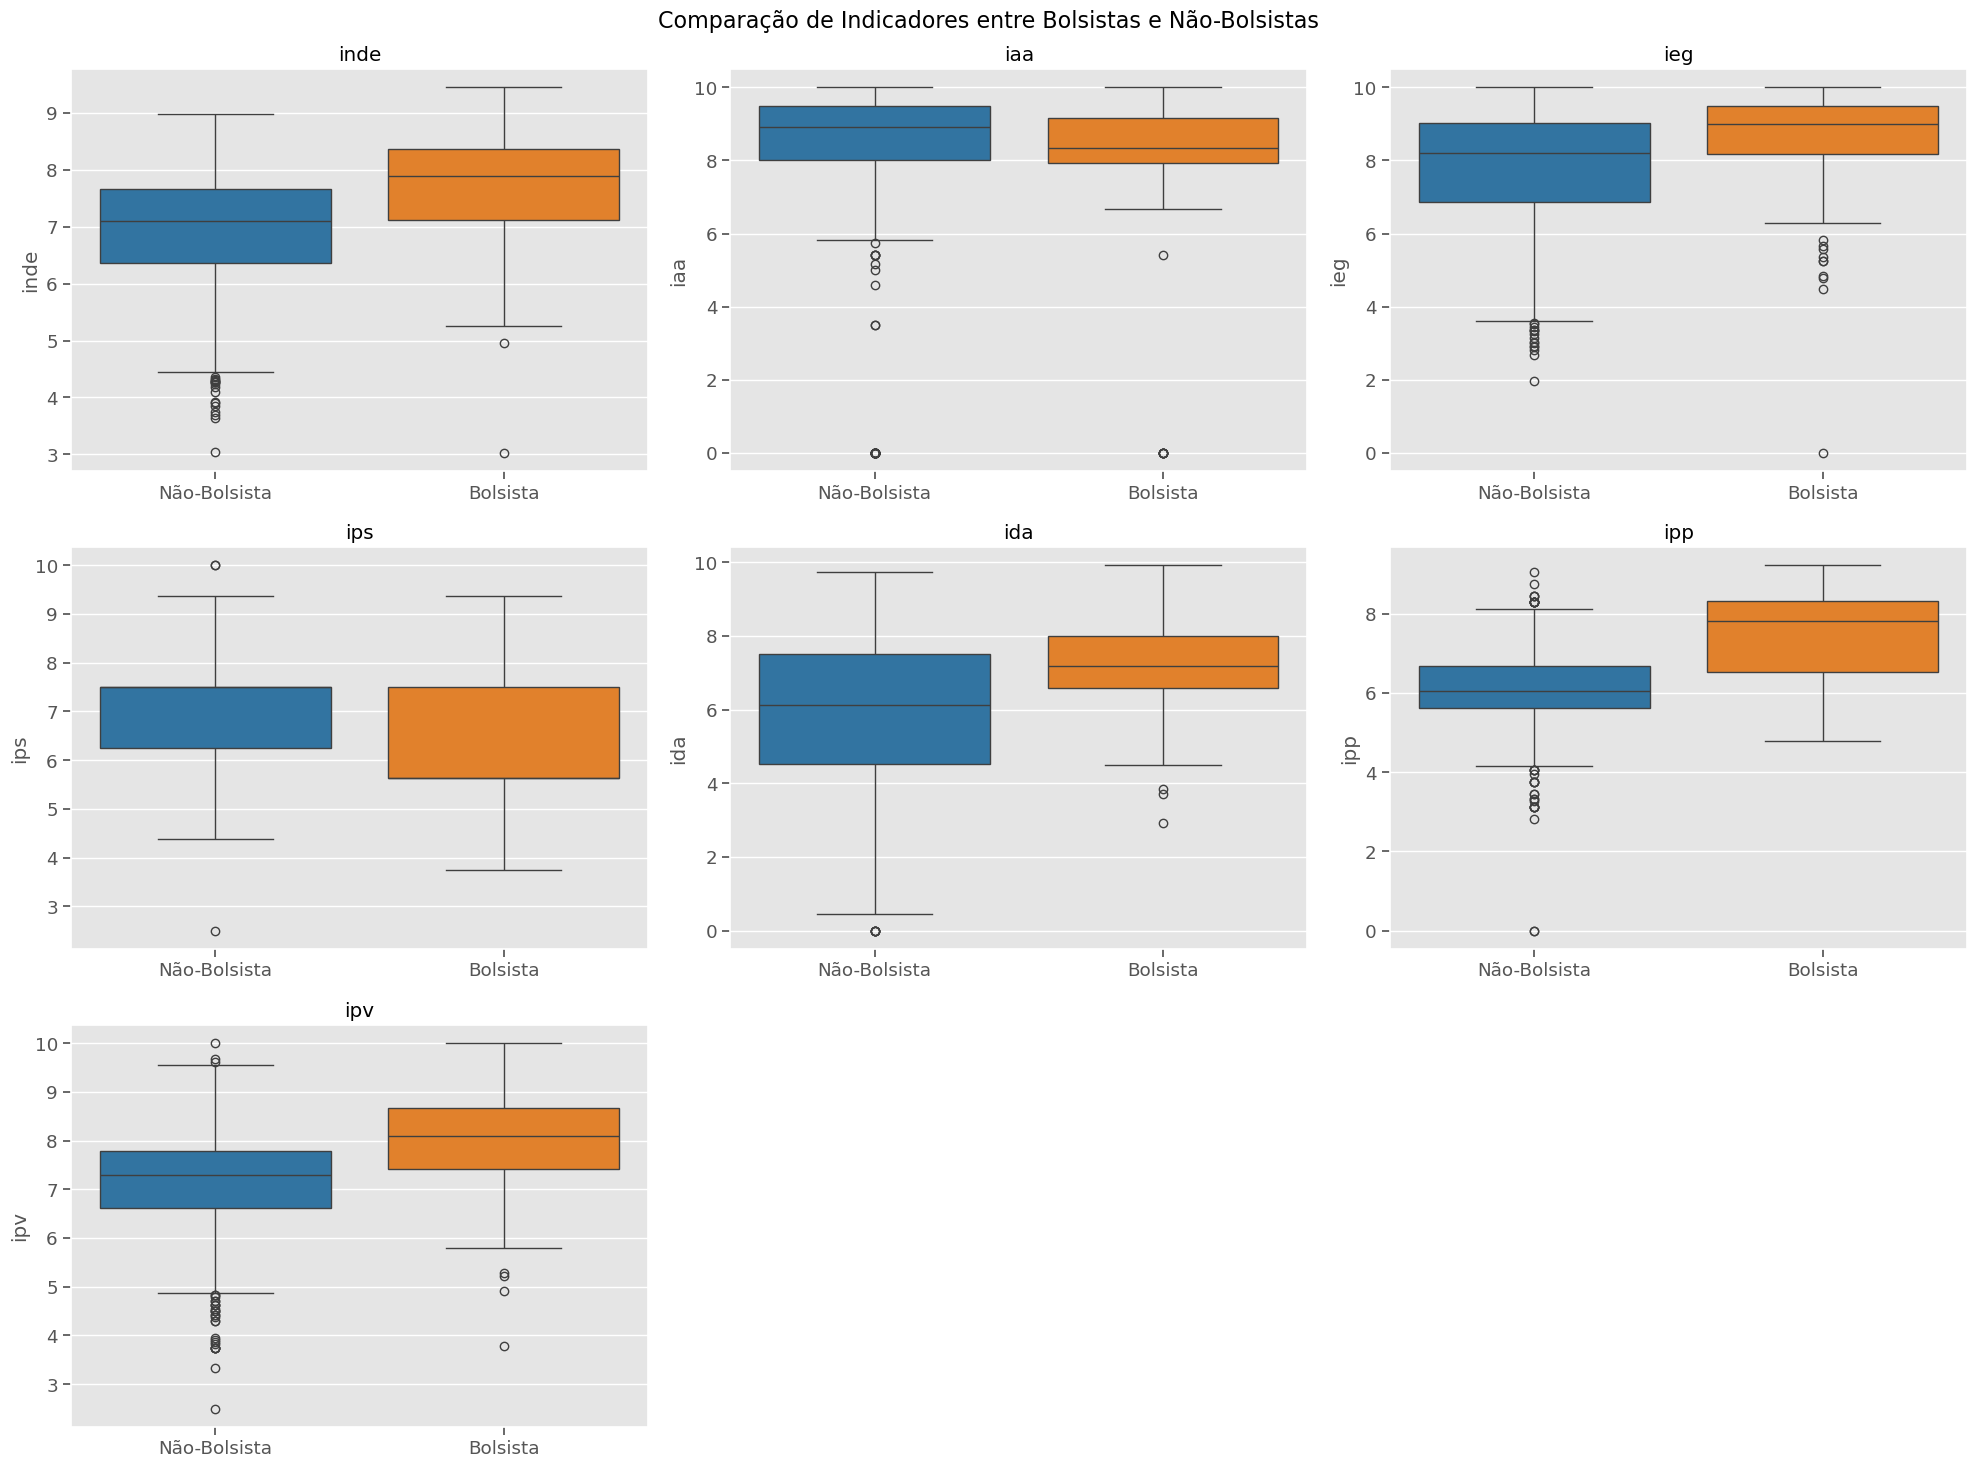

In [209]:
import warnings
warnings.filterwarnings("ignore")

# Filter numeric variables that are present in df_complete
numeric_vars_filtered = [var for var in numeric_vars if var in df_complete.columns]

# Calculate the number of rows and columns for the grid
n_vars = len(numeric_vars_filtered)
n_cols = 3  # You can adjust this to change the number of columns in the grid
n_rows = (n_vars + n_cols - 1) // n_cols

# Create the grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle("Comparação de Indicadores entre Bolsistas e Não-Bolsistas", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Define colors for each category
colors = ['#1f77b4', '#ff7f0e']  # Blue for Não-Bolsista, Orange for Bolsista


# Create boxplots for each variable
for i, var in enumerate(numeric_vars_filtered):
    sns.boxplot(x="categoria_bolsista", y=var, data=df_complete, ax=axes[i], palette=colors)
    axes[i].set_title(var)
    axes[i].set_xlabel("")
    axes[i].set_xticklabels(["Não-Bolsista", "Bolsista"])

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [206]:
# Lista de indicadores para análise
indicadores = ['inde', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv']

# Dicionário para armazenar os resultados
resultados = {}

for indicador in indicadores:
    bolsistas = df_complete[df_complete["bolsista"] == 1][indicador].dropna()
    nao_bolsistas = df_complete[df_complete["bolsista"] == 0][indicador].dropna()
    
    # Aplicando o teste de Mann-Whitney U
    statistic, p_value = stats.mannwhitneyu(bolsistas, nao_bolsistas, alternative='two-sided')
    
    resultados[indicador] = {
        'estatistica': statistic,
        'p_valor': p_value,
        'significativo': p_value < 0.05
    }


# Criando um DataFrame com os resultados para melhor visualização
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados['Indicador'] = df_resultados.index
df_resultados = df_resultados.rename(columns={
    'estatistica': 'Estatística U',
    'p_valor': 'p-valor',
    'significativo': 'Diferença Significativa'
})
df_resultados = df_resultados[['Indicador', 'Estatística U', 'p-valor', 'Diferença Significativa']]

# Exibindo o DataFrame de resultados
display(df_resultados.style.format({
    'Estatística U': '{:.4f}',
    'p-valor': '{:.4f}'
}))


,Indicador,Estatística U,p-valor,Diferença Significativa
inde,inde,59246.0000,0.0000,True
iaa,iaa,36292.5000,0.0663,False
ieg,ieg,53815.0000,0.0000,True
ips,ips,31307.5000,0.0000,True
ida,ida,54641.5000,0.0000,True
ipp,ipp,68227.0000,0.0000,True
ipv,ipv,59019.5000,0.0000,True


p < 0.05: "Há uma diferença estatisticamente significativa no INDE entre bolsistas e não bolsistas. Com base na estatística t (positiva), podemos concluir que os bolsistas têm um INDE médio significativamente maior que os não bolsistas."

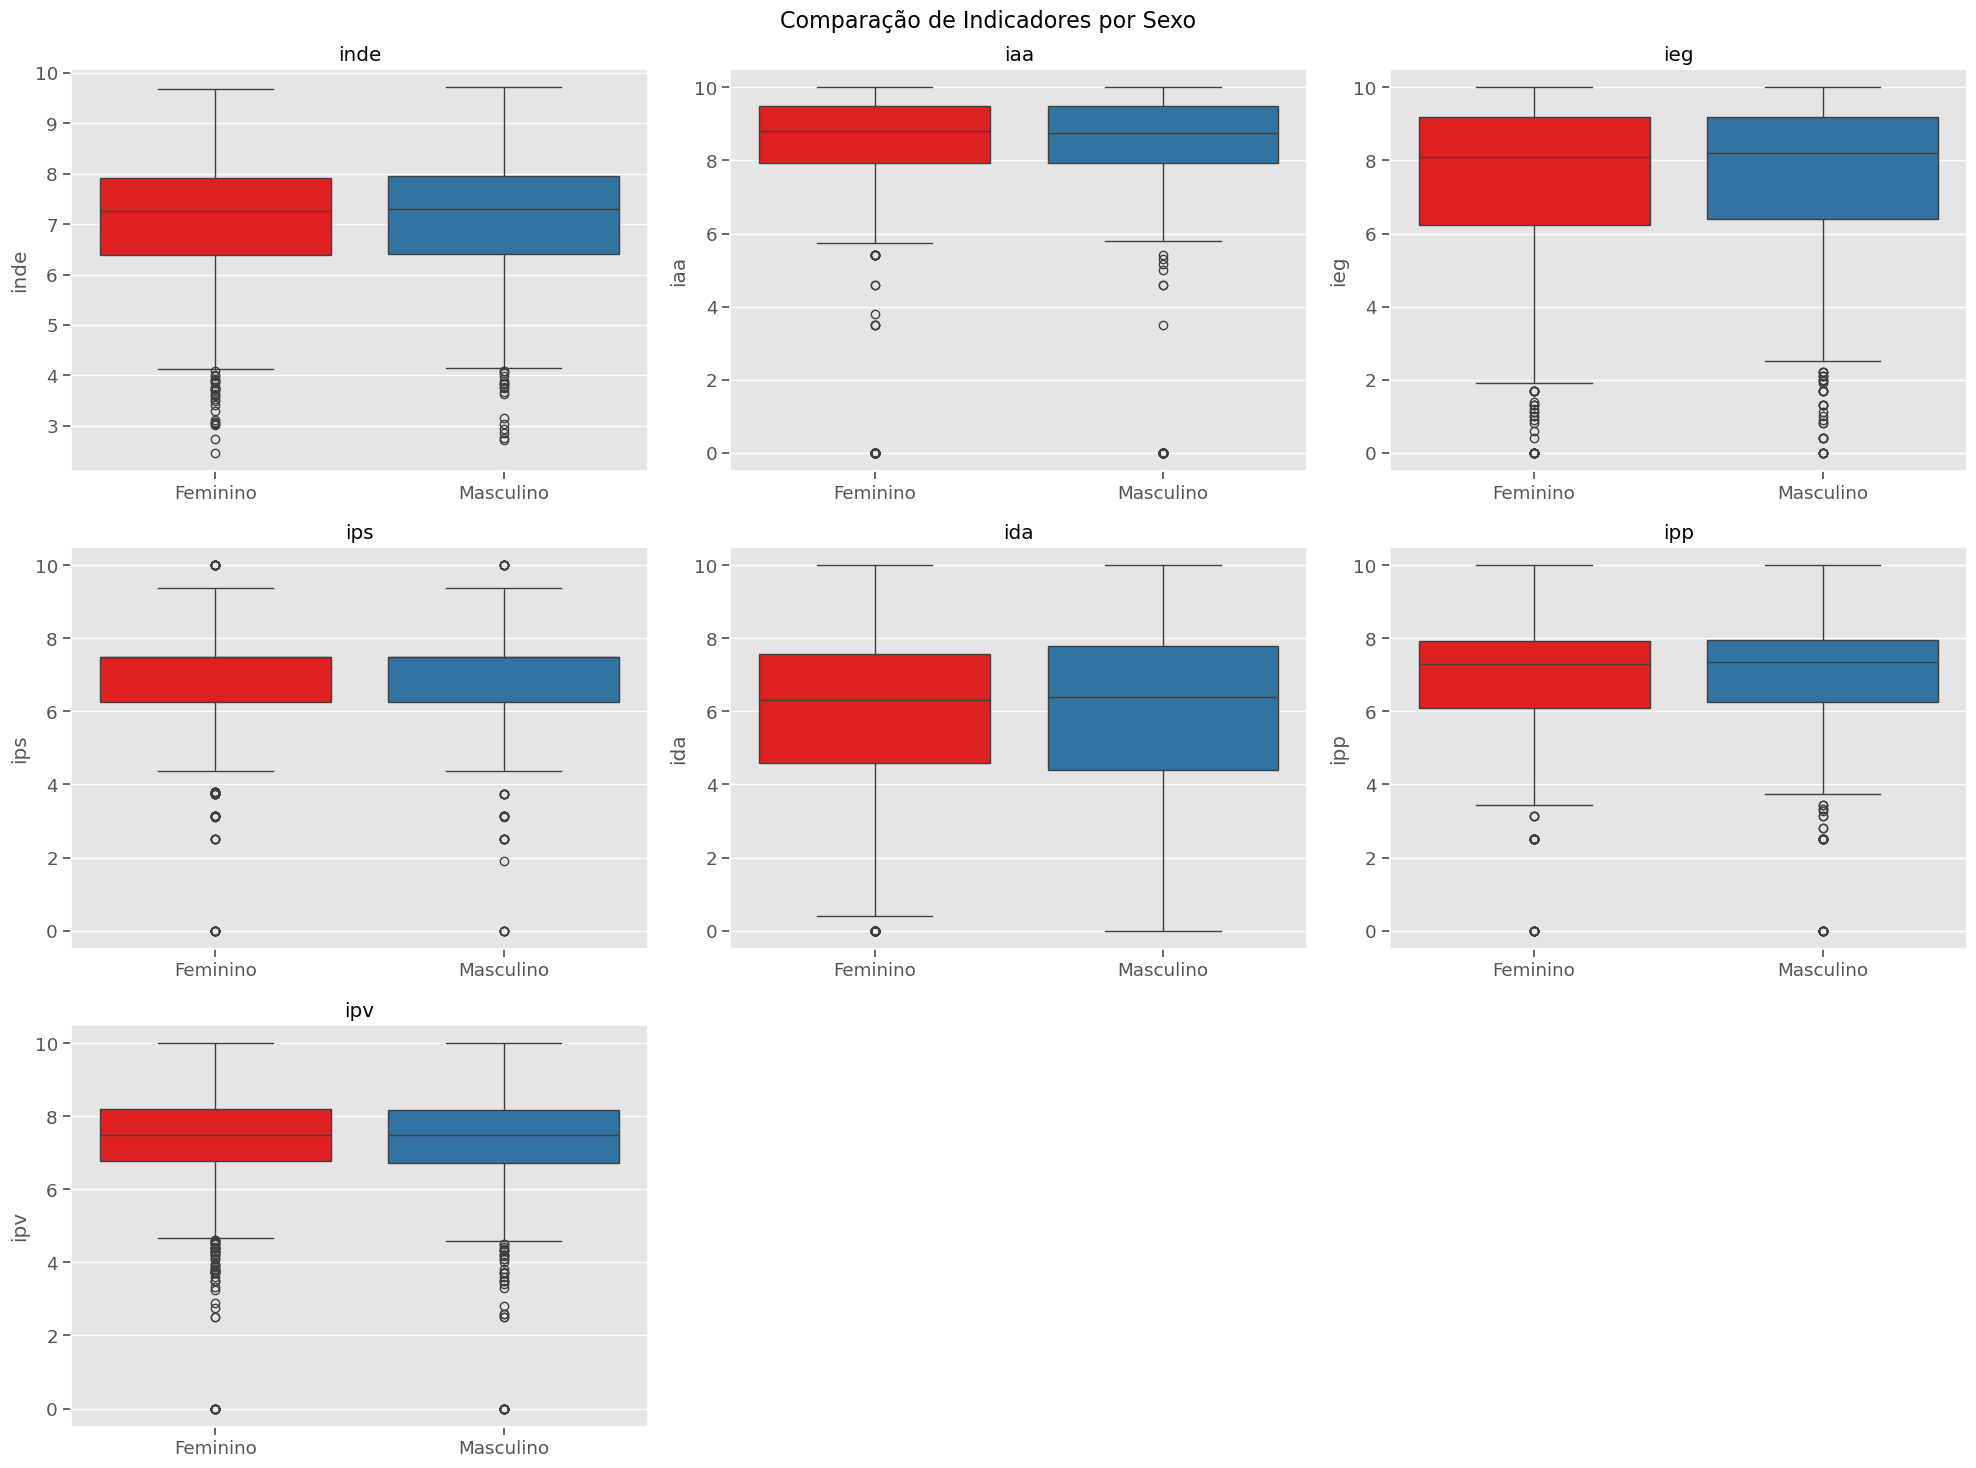

In [212]:
import warnings
warnings.filterwarnings("ignore")

# Filter numeric variables that are present in df_complete
numeric_vars_filtered = [var for var in numeric_vars if var in df_complete.columns]

# Calculate the number of rows and columns for the grid
n_vars = len(numeric_vars_filtered)
n_cols = 3  # You can adjust this to change the number of columns in the grid
n_rows = (n_vars + n_cols - 1) // n_cols

# Create the grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle("Comparação de Indicadores por Sexo", fontsize=16)

# Flatten the axes array for easier iteration
axes = axes.flatten()
# Define colors for each category
colors = ['#FF0000', '#1f77b4']  # Red for Female, Blue for Male
# Create boxplots for each variable
for i, var in enumerate(numeric_vars_filtered):
    sns.boxplot(x="sexo", y=var, data=df_complete, ax=axes[i], palette=colors)
    axes[i].set_title(var)
    axes[i].set_xlabel("")
    axes[i].set_xticklabels(["Feminino", "Masculino"])

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [213]:
# Lista de indicadores para análise
indicadores = ['inde', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv']

# Dicionário para armazenar os resultados
resultados = {}

for indicador in indicadores:
    masculino = df_complete[df_complete["sexo"] == "M"][indicador].dropna()
    feminino = df_complete[df_complete["sexo"] == "F"][indicador].dropna()
    
    # Aplicando o teste de Mann-Whitney U
    statistic, p_value = stats.mannwhitneyu(masculino, feminino, alternative='two-sided')
    
    resultados[indicador] = {
        'estatistica': statistic,
        'p_valor': p_value,
        'significativo': p_value < 0.05
    }


# Criando um DataFrame com os resultados para melhor visualização
df_resultados = pd.DataFrame.from_dict(resultados, orient='index')
df_resultados['Indicador'] = df_resultados.index
df_resultados = df_resultados.rename(columns={
    'estatistica': 'Estatística U',
    'p_valor': 'p-valor',
    'significativo': 'Diferença Significativa'
})
df_resultados = df_resultados[['Indicador', 'Estatística U', 'p-valor', 'Diferença Significativa']]

# Exibindo o DataFrame de resultados
display(df_resultados.style.format({
    'Estatística U': '{:.4f}',
    'p-valor': '{:.4f}'
}))

,Indicador,Estatística U,p-valor,Diferença Significativa
inde,inde,650862.0000,0.4422,False
iaa,iaa,618549.0000,0.1897,False
ieg,ieg,656978.0000,0.2451,False
ips,ips,641978.5000,0.8233,False
ida,ida,650144.5000,0.4700,False
ipp,ipp,649505.0000,0.4953,False
ipv,ipv,639617.0000,0.9638,False


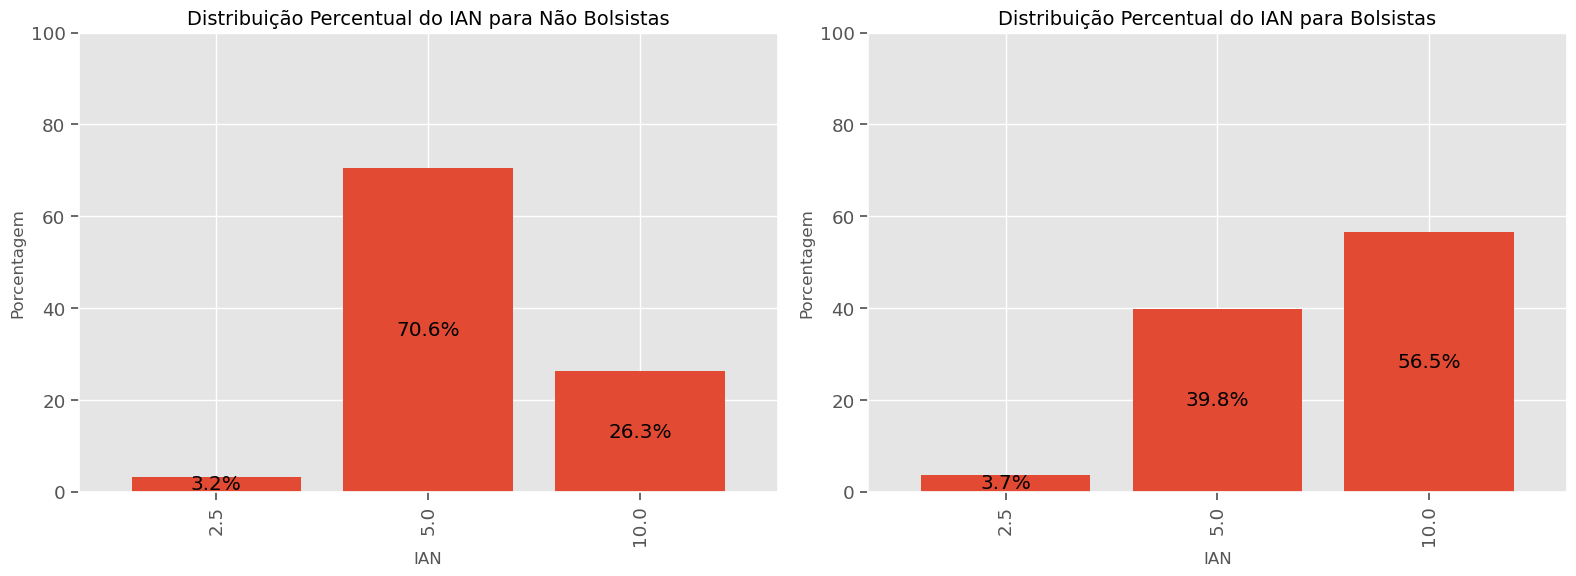

Percentuais para Não Bolsistas:
ian
2.5      3.183024
5.0     70.557029
10.0    26.259947
Name: 0.0, dtype: float64

Percentuais para Bolsistas:
ian
2.5      3.703704
5.0     39.814815
10.0    56.481481
Name: 1.0, dtype: float64


In [204]:
# Preparando os dados
ian_bolsista_data = df_complete[['ian', 'bolsista']].dropna()

# Filtrando apenas os valores de IAN permitidos
ian_bolsista_data = ian_bolsista_data[ian_bolsista_data['ian'].isin([2.5, 5.0, 10.0])]

# Calculando as porcentagens para cada grupo (bolsista e não bolsista)
ian_bolsista_percentages = ian_bolsista_data.groupby('bolsista')['ian'].value_counts(normalize=True).unstack() * 100

# Criando o gráfico de barras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ian_bolsista_percentages.loc[0].plot(kind='bar', ax=ax1, width=0.8)
ian_bolsista_percentages.loc[1].plot(kind='bar', ax=ax2, width=0.8)

# Personalizando os gráficos
ax1.set_title('Distribuição Percentual do IAN para Não Bolsistas', fontsize=14)
ax2.set_title('Distribuição Percentual do IAN para Bolsistas', fontsize=14)
for ax in (ax1, ax2):
    ax.set_xlabel('IAN', fontsize=12)
    ax.set_ylabel('Porcentagem', fontsize=12)
    ax.set_ylim(0, 100)

# Adicionando rótulos nas barras
for ax in (ax1, ax2):
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# Exibindo os percentuais
print("Percentuais para Não Bolsistas:")
print(ian_bolsista_percentages.loc[0])
print("\nPercentuais para Bolsistas:")
print(ian_bolsista_percentages.loc[1])

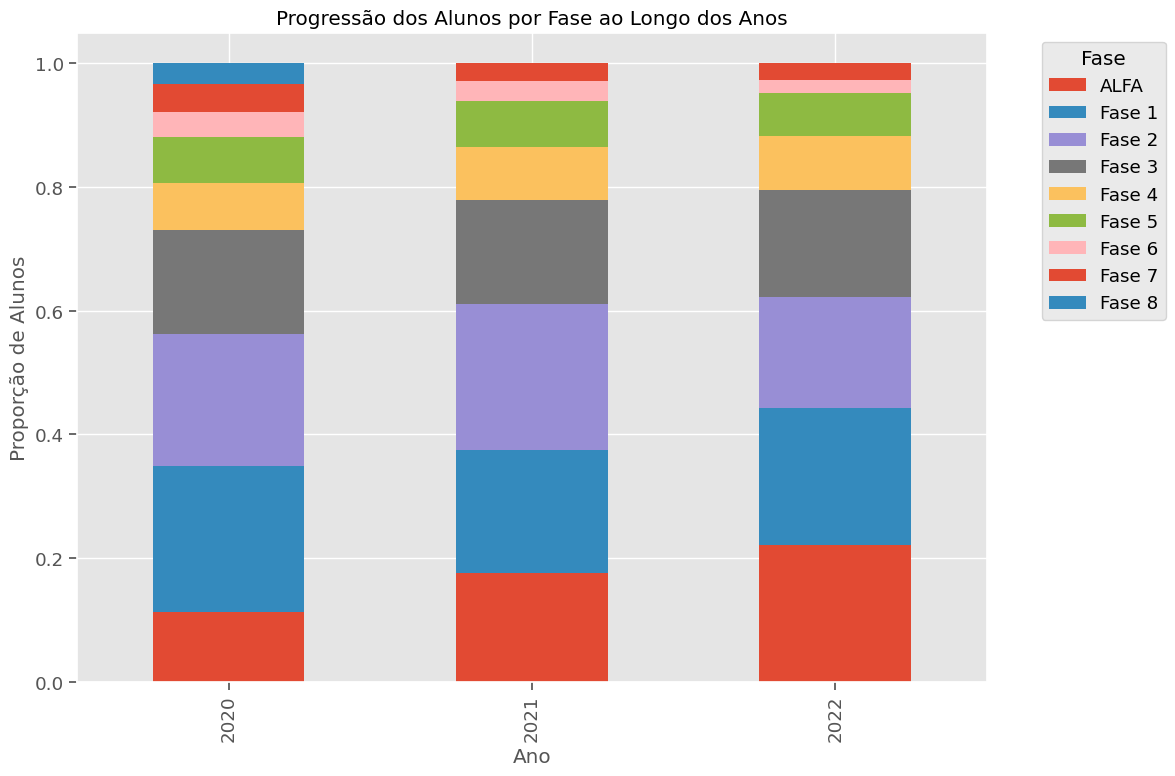

In [190]:
# Análise da progressão dos alunos
progression = df_complete.groupby("ano")["fase"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por Fase ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


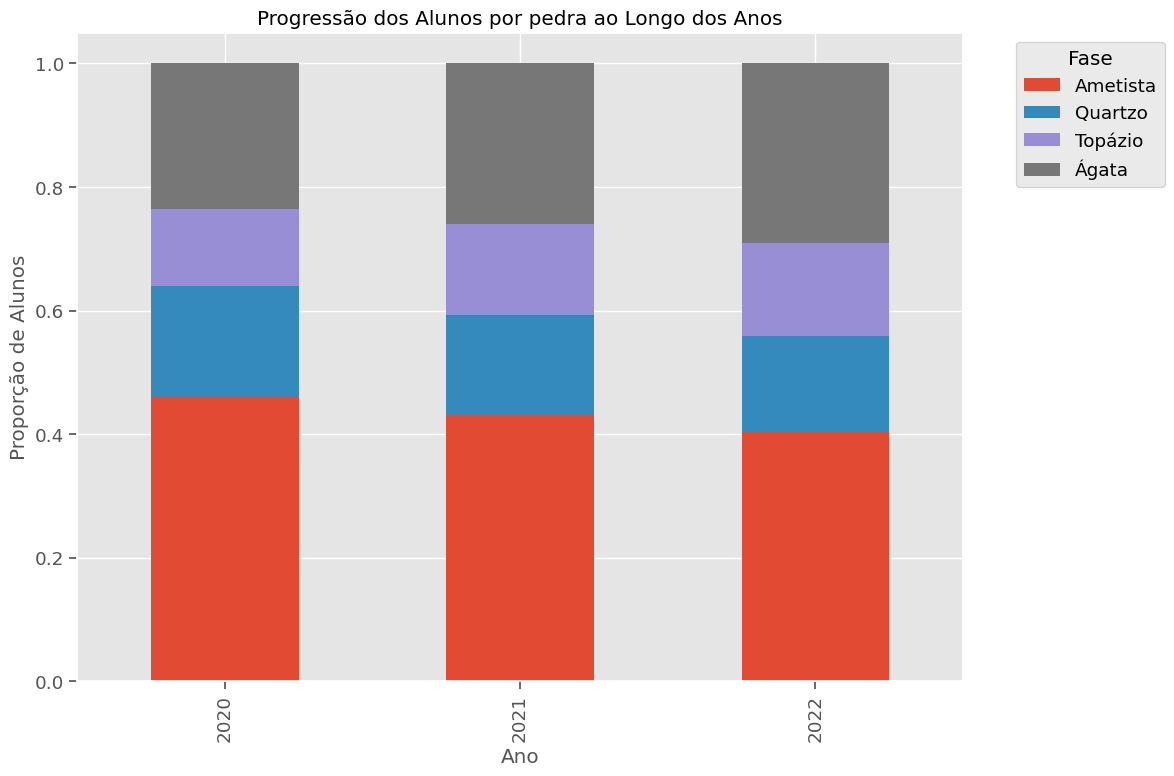

In [261]:
# Análise da progressão dos alunos
progression = df_complete.groupby("ano")["pedra"].value_counts(normalize=True).unstack()
progression.plot(kind="bar", stacked=True)
plt.title("Progressão dos Alunos por pedra ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Proporção de Alunos")
plt.legend(title="Fase", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
df_complete.info()


In [ ]:
ax = sns.displot(df_complete["idade_aluno"])


In [ ]:
ax = sns.displot(df_complete["inde"])


In [ ]:
from seaborn import jointplot


new_df = df_cleaned.copy()
jointplot(x="idade_aluno", y="inde", data=new_df, kind="reg", color="green")


## Feature Engineering

In [ ]:
numeric_vars = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_numerical = df_cleaned[numeric_vars].copy()
corr_matrix = df_numerical.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap="viridis",
    center=0,
    annot_kws={"size": 8, "rotation": 45},
    fmt=".2f",
    linewidths=0.5,
)
# Adicionar um título (opcional)
plt.title("Matriz de Correlação")

# Mostrar o gráfico
plt.show()


### Tratamento de dados categóricos

In [214]:
import category_encoders as ce


# select non numerical columns
df_non_numerical = df_cleaned[
    df_cleaned.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
]

df_non_numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   nome                      4044 non-null   string  
 1   instituicao_ensino_aluno  1413 non-null   object  
 2   inde_conceito             727 non-null    category
 3   pedra                     2275 non-null   object  
 4   destaque_ieg              1589 non-null   string  
 5   destaque_ida              1589 non-null   string  
 6   destaque_ipv              1565 non-null   string  
 7   fase                      2275 non-null   object  
 8   turma                     2275 non-null   object  
 9   sinalizador_ingressante   686 non-null    category
 10  rec_ava_1                 1548 non-null   category
 11  rec_ava_2                 1548 non-null   object  
 12  rec_ava_3                 1312 non-null   object  
 13  rec_ava_4                 971 non-null    object

In [215]:
categorical_vars = df_non_numerical.columns.tolist()
for var in categorical_vars:
    if var in df_non_numerical.columns:
        print(f"\nContagem para {var}:")
        print(df_non_numerical[var].value_counts().sort_values())



Contagem para nome:
nome
aluno1       3
aluno904     3
aluno903     3
aluno902     3
aluno901     3
            ..
aluno444     3
aluno423     3
aluno462     3
aluno450     3
aluno1349    3
Name: count, Length: 1348, dtype: Int64

Contagem para instituicao_ensino_aluno:
instituicao_ensino_aluno
Einstein                   2
Escola João Paulo II       2
Escola JP II               2
Estácio                    3
UNISA                     10
FIAP                      11
Rede Decisão/União       101
Rede Decisão             127
Escola Pública          1155
Name: count, dtype: int64

Contagem para inde_conceito:
inde_conceito
A     92
D    128
C    171
B    336
Name: count, dtype: int64

Contagem para pedra:
pedra
#NULO!        2
Topázio     323
Quartzo     372
Ágata       599
Ametista    979
Name: count, dtype: int64

Contagem para destaque_ieg:
destaque_ieg
Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.              12
Ponto a melhorar em 2021: Melhorar o seu engaja

In [217]:
# Aplicar pré-processamento às colunas relevantes
columns_to_process = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]


df_to_process = df_cleaned.copy()

df_to_process.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   id                        4044 non-null   int64   
 1   ano                       4044 non-null   int64   
 2   nome                      4044 non-null   string  
 3   instituicao_ensino_aluno  1413 non-null   object  
 4   idade_aluno               727 non-null    Int64   
 5   anos_pm                   727 non-null    Int64   
 6   ponto_virada              2247 non-null   float64 
 7   inde                      2273 non-null   float64 
 8   inde_conceito             727 non-null    category
 9   pedra                     2275 non-null   object  
 10  destaque_ieg              1589 non-null   string  
 11  destaque_ida              1589 non-null   string  
 12  destaque_ipv              1565 non-null   string  
 13  iaa                       2275 non-null   float6

#### Compreensão das colunas: destaque_ida, destaque_ipv, destaque_ieg por meio de NLP 

In [219]:
display(df_to_process["destaque_ipv"].unique())
display(df_to_process["destaque_ieg"].unique())
display(df_to_process["destaque_ida"].unique())


<StringArray>
['Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.',
                                                                        <NA>,
 'Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos.',
             'Destaque: A sua boa integração aos Princípios Passos Mágicos.',
                 'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.']
Length: 5, dtype: string

<StringArray>
[                    'Seu destaque em 2020: A sua boa entrega das lições de casa.',
                                                                              <NA>,
             'Ponto a melhorar em 2021: Melhorar a sua entrega de lições de casa.',
          'Seu destaque em 2020: O seu bom engajamento nas ações de voluntariado.',
 'Ponto a melhorar em 2021: Melhorar o seu engajamento nas ações de voluntariado.',
                                 'Destaque: A sua boa entrega das lições de casa.',
                             'Melhorar: Melhorar a sua entrega de lições de casa.']
Length: 7, dtype: string

<StringArray>
['Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.',
                                                                 <NA>,
        'Seu destaque em 2020: As suas boas notas na Passos Mágicos.',
             'Seu destaque em 2020: As suas boas notas na Faculdade.',
              'Ponto a melhorar em 2021: As suas notas na Faculdade.',
                    'Destaque: As suas boas notas na Passos Mágicos.',
                 'Melhorar: Empenhar-se mais nas aulas e avaliações.']
Length: 7, dtype: string

In [228]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
import pandas as pd
import unidecode

# Download necessary NLTK data
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("rslp")


def preprocess_text(text):
    if pd.isna(text):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove accents
    text = unidecode.unidecode(text)

    # Remove special characters and digits
    text = re.sub(r"[^a-z\s]", "", text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("portuguese"))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = RSLPStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return " ".join(tokens)


# Example usage
texts = [
    "Seu destaque em 2020: A sua boa integração aos Princípios Passos Mágicos.",
    "Ponto a melhorar em 2021: Integrar-se mais aos Princípios Passos Mágicos.",
    "Destaque: A sua boa integração aos Princípios Passos Mágicos.",
    "Melhorar: Integrar-se mais aos Princípios Passos Mágicos.",
]

# Preprocess the texts
preprocessed_texts = [preprocess_text(text) for text in texts]

print("Preprocessed texts:")
for text in preprocessed_texts:
    print(text)


Preprocessed texts:
destaqu boa integraca principi pass magic
pont melhor integrars principi pass magic
destaqu boa integraca principi pass magic
melhor integrars principi pass magic


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     /Users/carlosneves/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [229]:
def analyze_sentiment(text):
    positive_words = ["destaque", "boa", "bom", "boas"]
    negative_words = ["melhorar", "mais", "melhor"]

    if any(word in text for word in positive_words):
        return "Positive"
    elif any(word in text for word in negative_words):
        return "Negative"
    else:
        return ""


# Example usage
preprocessed_texts = [
    "destaqu boa integrac principi pass magic",
    "melhor integr principi pass magic",
    "destaqu boa integrac principi pass magic",
    "melhor integr principi pass magic",
]

sentiments = [analyze_sentiment(text) for text in preprocessed_texts]

for text, sentiment in zip(preprocessed_texts, sentiments):
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment}\n")


Text: destaqu boa integrac principi pass magic
Sentiment: Positive

Text: melhor integr principi pass magic
Sentiment: Negative

Text: destaqu boa integrac principi pass magic
Sentiment: Positive

Text: melhor integr principi pass magic
Sentiment: Negative



#### Análise de sentimento das colunas `destaque`

In [230]:
df_sentimento_destaque = pd.DataFrame(
    {
        "ipv": df_cleaned["destaque_ipv"].apply(lambda x: "" if pd.isna(x) else x),
        "ieg": df_cleaned["destaque_ieg"].apply(lambda x: "" if pd.isna(x) else x),
        "ida": df_complete["destaque_ida"].apply(lambda x: "" if pd.isna(x) else x),
    }
)

df_sentimento_destaque


ipv  \
0              Seu destaque em 2020: A sua boa integração aos...   
1                                                                  
2              Seu destaque em 2020: A sua boa integração aos...   
3              Ponto a melhorar em 2021: Integrar-se mais aos...   
4              Seu destaque em 2020: A sua boa integração aos...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ieg  \
0              Seu destaque em 2020: A sua boa entrega das li...   
1                                                                  
2              Seu destaque em 2020: A sua boa entrega das li...   
3              Ponto a melhorar em 2021: Melhorar a sua entre...   
4              Seu destaque em 2020: A sua boa entrega das li...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ida  
0                                                            NaN  
1                                                            NaN  
2                                                            NaN  
3                                                            NaN  
4                                                            NaN  
...                                                          ...  
aluno998_2022  Melhorar: Empenhar-se mais nas aulas e avaliaç...  
aluno999_2020  Ponto a melhorar em 2021: Empenhar-se mais nas...  
aluno999_2021                                                     
aluno99_2022   Melhorar: Empenhar-se mais nas aulas e avaliaç...  
aluno9_2022    Melhorar: Empenhar-se mais nas aulas e avaliaç...  

[6317 rows x 3 columns]

In [231]:
for col in df_sentimento_destaque.columns:
    df_sentimento_destaque[f"{col}_pre_processado"] = df_sentimento_destaque[col].apply(
        preprocess_text
    )
df_sentimento_destaque


ipv  \
0              Seu destaque em 2020: A sua boa integração aos...   
1                                                                  
2              Seu destaque em 2020: A sua boa integração aos...   
3              Ponto a melhorar em 2021: Integrar-se mais aos...   
4              Seu destaque em 2020: A sua boa integração aos...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ieg  \
0              Seu destaque em 2020: A sua boa entrega das li...   
1                                                                  
2              Seu destaque em 2020: A sua boa entrega das li...   
3              Ponto a melhorar em 2021: Melhorar a sua entre...   
4              Seu destaque em 2020: A sua boa entrega das li...   
...                                                          ...   
aluno998_2022                                                NaN   
aluno999_2020                                                NaN   
aluno999_2021                                                NaN   
aluno99_2022                                                 NaN   
aluno9_2022                                                  NaN   

                                                             ida  \
0                                                            NaN   
1                                                            NaN   
2                                                            NaN   
3                                                            NaN   
4                                                            NaN   
...                                                          ...   
aluno998_2022  Melhorar: Empenhar-se mais nas aulas e avaliaç...   
aluno999_2020  Ponto a melhorar em 2021: Empenhar-se mais nas...   
aluno999_2021                                                      
aluno99_2022   Melhorar: Empenhar-se mais nas aulas e avaliaç...   
aluno9_2022    Melhorar: Empenhar-se mais nas aulas e avaliaç...   

                                      ipv_pre_processado  \
0              destaqu boa integraca principi pass magic   
1                                                          
2              destaqu boa integraca principi pass magic   
3              pont melhor integrars principi pass magic   
4              destaqu boa integraca principi pass magic   
...                                                  ...   
aluno998_2022                                              
aluno999_2020                                              
aluno999_2021                                              
aluno99_2022                                               
aluno9_2022                                                

                               ieg_pre_processado  \
0                     destaqu boa entreg lico cas   
1                                                   
2                     destaqu boa entreg lico cas   
3              pont melhor melhor entreg lico cas   
4                     destaqu boa entreg lico cas   
...                                           ...   
aluno998_2022                                       
aluno999_2020                                       
aluno999_2021                                       
aluno99_2022                                        
aluno9_2022                                         

                               ida_pre_processado  
0                                                  
1                                                  
2                                                  
3                                           

In [232]:
def analyze_sentiment(text):
    positive_words = ["destaque", "boa", "bom", "boas"]
    negative_words = ["melhorar", "mais", "melhor"]

    if any(word in text for word in positive_words):
        return "Positivo"
    elif any(word in text for word in negative_words):
        return "Negativo"
    else:
        return np.nan


In [233]:
pre_proc_cols = df_sentimento_destaque.columns[
    list(df_sentimento_destaque.columns.str.endswith("_pre_processado"))
].to_list()


In [234]:
for col in pre_proc_cols:
    df_sentimento_destaque[f"{col}_resultado"] = df_sentimento_destaque[col].apply(
        analyze_sentiment
    )

df_sentimento_destaque.head()


ipv  \
0  Seu destaque em 2020: A sua boa integração aos...   
1                                                      
2  Seu destaque em 2020: A sua boa integração aos...   
3  Ponto a melhorar em 2021: Integrar-se mais aos...   
4  Seu destaque em 2020: A sua boa integração aos...   

                                                 ieg  ida  \
0  Seu destaque em 2020: A sua boa entrega das li...  NaN   
1                                                     NaN   
2  Seu destaque em 2020: A sua boa entrega das li...  NaN   
3  Ponto a melhorar em 2021: Melhorar a sua entre...  NaN   
4  Seu destaque em 2020: A sua boa entrega das li...  NaN   

                          ipv_pre_processado  \
0  destaqu boa integraca principi pass magic   
1                                              
2  destaqu boa integraca principi pass magic   
3  pont melhor integrars principi pass magic   
4  destaqu boa integraca principi pass magic   

                   ieg_pre_processado ida_pre_processado  \
0         destaqu boa entreg lico cas                      
1                                                          
2         destaqu boa entreg lico cas                      
3  pont melhor melhor entreg lico cas                      
4         destaqu boa entreg lico cas                      

  ipv_pre_processado_resultado ieg_pre_processado_resultado  \
0                     Positivo                     Positivo   
1                          NaN                          NaN   
2                     Positivo                     Positivo   
3                     Negativo                     Negativo   
4                     Positivo                     Positivo   

  ida_pre_processado_resultado  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

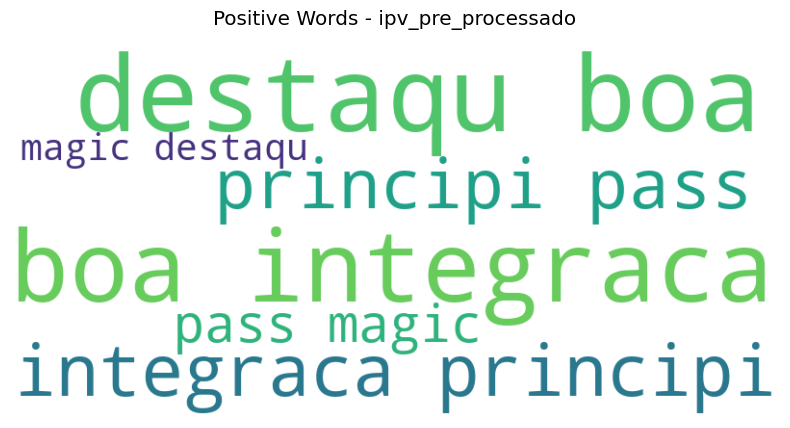

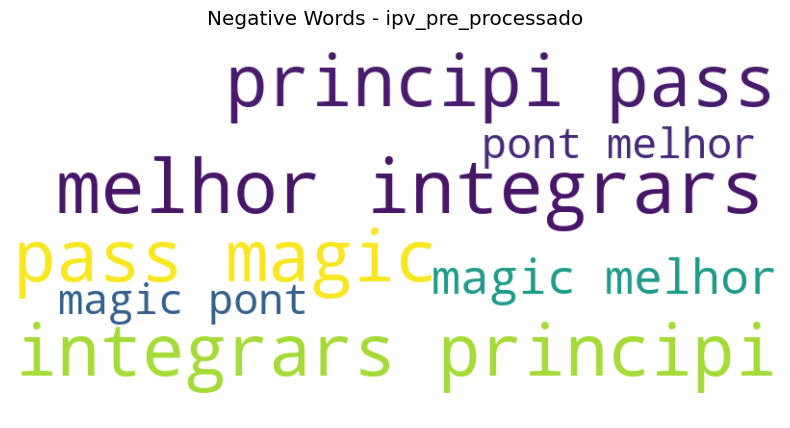

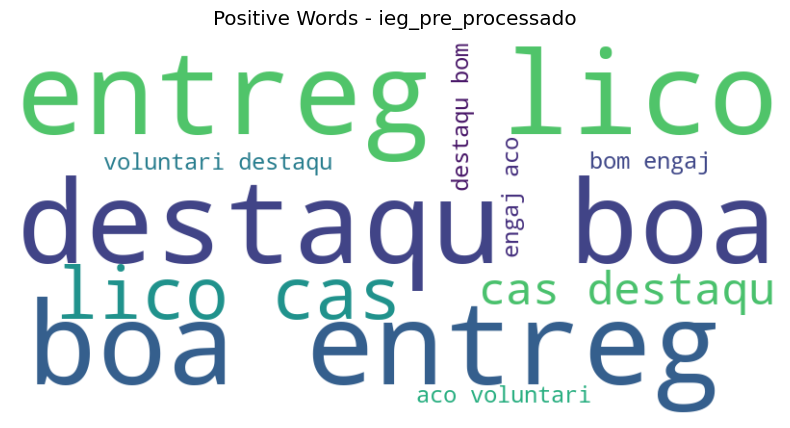

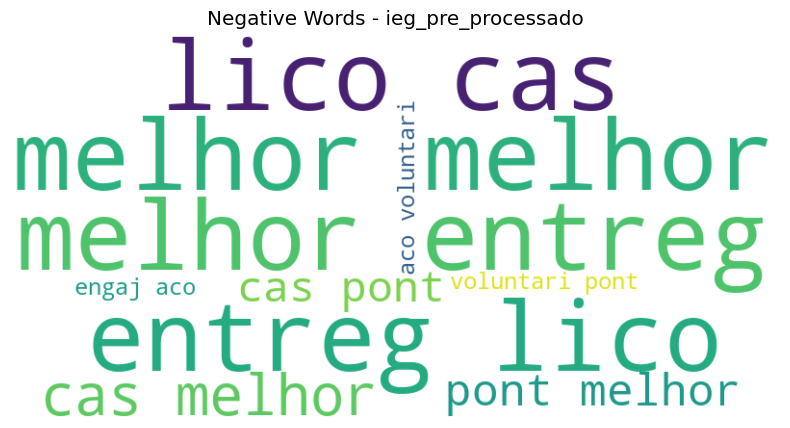

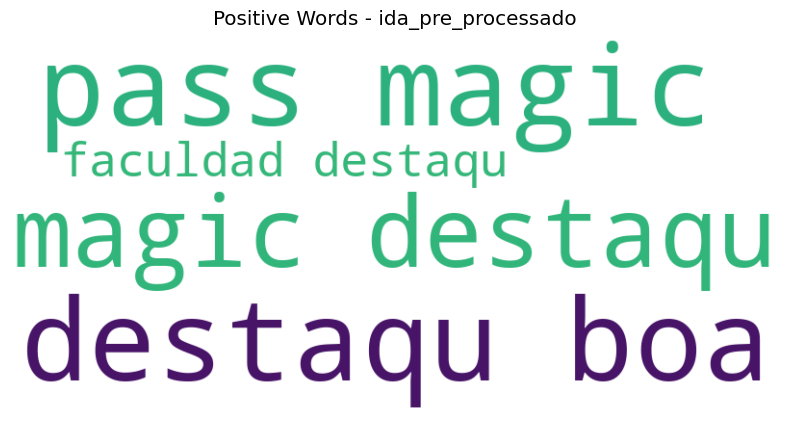

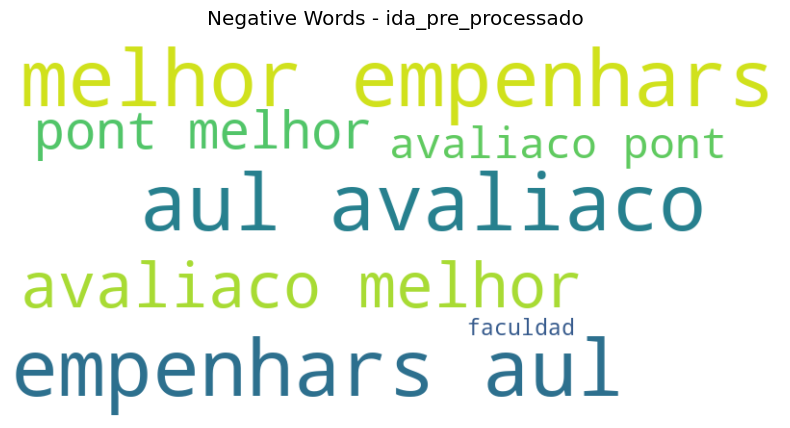


Statistics for ipv_pre_processado:
ipv_pre_processado_resultado
Negativo    0.545048
Positivo    0.454952
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
destaqu      712
boa          712
integraca    712
principi     712
pass         712
magic        712
Name: count, dtype: int64

Top 10 words in negative sentiments:
melhor       853
integrars    853
principi     853
pass         853
magic        853
pont         368
Name: count, dtype: int64

Statistics for ieg_pre_processado:
ieg_pre_processado_resultado
Positivo    0.670233
Negativo    0.329767
Name: proportion, dtype: float64

Top 10 words in positive sentiments:
destaqu      1065
boa          1053
entreg       1053
lico         1053
cas          1053
bom            12
engaj          12
aco            12
voluntari      12
Name: count, dtype: int64

Top 10 words in negative sentiments:
melhor       1048
entreg        512
lico          512
cas           512
pont          239
engaj          12
aco            1

In [238]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Combine all pre-processed text for each sentiment
for col in pre_proc_cols:
    positive_text = ' '.join(df_sentimento_destaque[df_sentimento_destaque[f"{col}_resultado"] == "Positivo"][col].dropna())
    negative_text = ' '.join(df_sentimento_destaque[df_sentimento_destaque[f"{col}_resultado"] == "Negativo"][col].dropna())
    
    # Generate word clouds
    generate_wordcloud(positive_text, f"Positive Words - {col}")
    generate_wordcloud(negative_text, f"Negative Words - {col}")

# Print some statistics
for col in pre_proc_cols:
    print(f"\nStatistics for {col}:")
    print(df_sentimento_destaque[f"{col}_resultado"].value_counts(normalize=True))
    print("\nTop 10 words in positive sentiments:")
    print(pd.Series(' '.join(df_sentimento_destaque[df_sentimento_destaque[f"{col}_resultado"] == "Positivo"][col].dropna()).split()).value_counts().head(10))
    print("\nTop 10 words in negative sentiments:")
    print(pd.Series(' '.join(df_sentimento_destaque[df_sentimento_destaque[f"{col}_resultado"] == "Negativo"][col].dropna()).split()).value_counts().head(10))


In [235]:
pre_proc_res_cols = df_sentimento_destaque.columns[
    list(df_sentimento_destaque.columns.str.endswith("_resultado"))
].to_list()

df_sentimento_destaque[pre_proc_res_cols].head()


ipv_pre_processado_resultado ieg_pre_processado_resultado  \
0                     Positivo                     Positivo   
1                          NaN                          NaN   
2                     Positivo                     Positivo   
3                     Negativo                     Negativo   
4                     Positivo                     Positivo   

  ida_pre_processado_resultado  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [242]:
df = {}
for col in pre_proc_res_cols:
    df.update({col: df_sentimento_destaque[col].value_counts()})
df = pd.DataFrame(df)

df


ipv_pre_processado_resultado  ieg_pre_processado_resultado  \
Negativo                           853                           524   
Positivo                           712                          1065   

          ida_pre_processado_resultado  
Negativo                          1031  
Positivo                           558

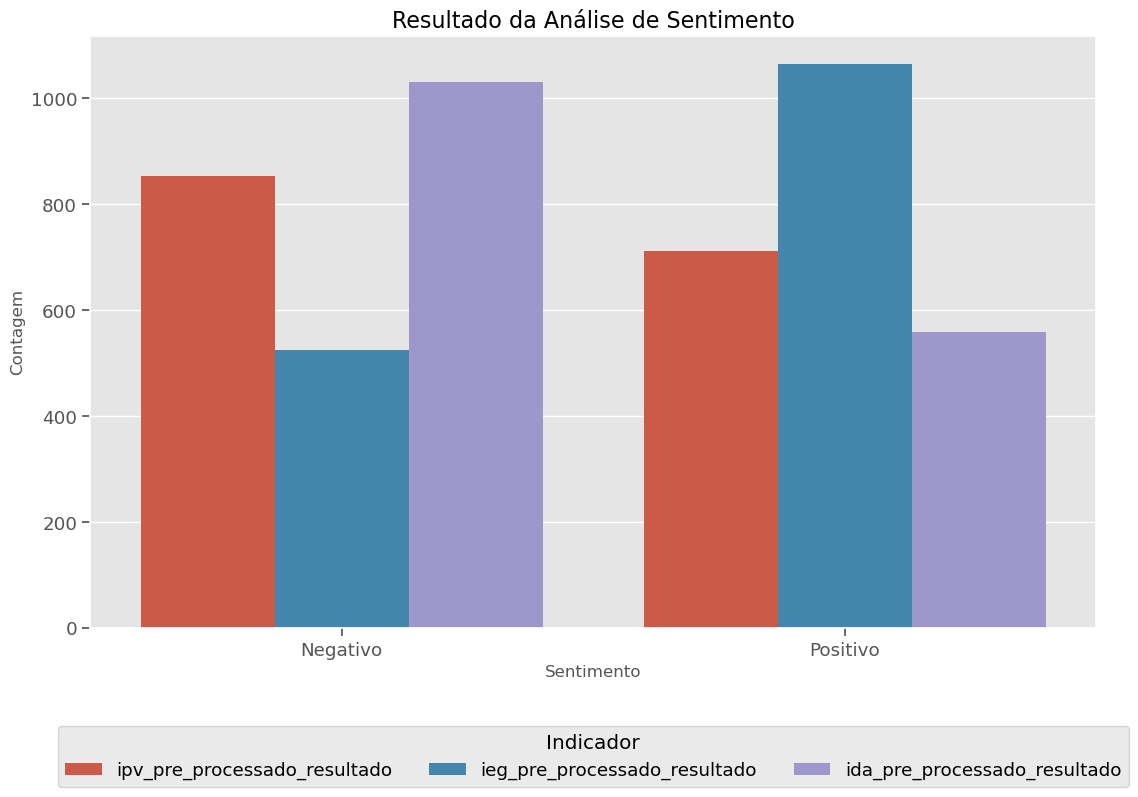

In [245]:

# Melt the dataframe to create a long format suitable for seaborn
df_melted = df.reset_index().melt(id_vars='index', var_name='Column', value_name='Count')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='index', y='Count', hue='Column')

plt.title('Resultado da Análise de Sentimento', fontsize=16)
plt.xlabel('Sentimento', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(rotation=0)

# Reposition the legend to the bottom
plt.legend(title='Indicador', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Adjust the bottom margin to make room for the legend
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
from pysentimiento import create_analyzer

modelo_analise_sentimento = create_analyzer(task="sentiment", lang="pt")


In [ ]:
modelo_analise_sentimento.predict(
    "Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações."
)


In [ ]:
df_sentimento["Sentimento"].unique().tolist()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")


def preprocess_text(text: str):
    if pd.isna(text):
        return ""  # Retorna uma string vazia para valores nulos
    text = str(text).lower()  # Converte para string antes de aplicar lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [ ]:
[
    print(modelo_analise_sentimento.predict(l))
    for l in df_sentimento["Sentimento"].unique().tolist()
]


In [ ]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)


df_sentiment = pd.DataFrame(
    {
        "text": [
            "Ponto a melhorar em 2021: Empenhar-se mais nas aulas e avaliações.",
            "Seu destaque em 2020: As suas boas notas na Passos Mágicos.",
            "Seu destaque em 2020: As suas boas notas na Faculdade.",
            "Ponto a melhorar em 2021: As suas notas na Faculdade.",
            "Destaque: As suas boas notas na Passos Mágicos.",
            "Melhorar: Empenhar-se mais nas aulas e avaliações.",
        ],
        "class": [
            "negativo",
            "positivo",
            "positivo",
            "negativo",
            "positivo",
            "negativo",
        ],
    }
)
df_sentiment


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit(df_sentiment.text)
text_vect = vect.transform(df_sentiment.text)

pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(ngram_range=(1, 1), use_idf=True)
vect.fit(df_sentiment.text)
text_vect = vect.transform(df_sentiment.text)

pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out())


In [ ]:
import nltk
import re
import string
import unicodedata

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")


def preprocess_text(text: str):
    if pd.isna(text):
        return ""  # Retorna uma string vazia para valores nulos
    text = str(text).lower()  # Converte para string antes de aplicar lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


sentiment_map = {
    "ieg": {
        "melhorar entrega licoes": -1,
        "melhorar engajamento voluntariado": -1,
        "destaque boa entrega licoes": 1,
        "destaque bom engajamento voluntariado": 1,
    },
    "ida": {
        "melhorar aulas avaliacoes": -1,
        "melhorar empenho": -1,
        "melhorar notas": -1,
        "melhora empenharse aulas" "destaque boas notas": 1,
    },
    "ipv": {"melhorar integracao principios": -1, "destaque integracao principios": 1},
}


def get_sentiment(text, indicator):
    preprocessed_text = preprocess_text(text)

    for key, value in sentiment_map[indicator].items():
        if all(word in preprocessed_text for word in key.split()):
            return value
    return 0  # Neutro se nenhuma expressão-chave for encontrada


# Aplicar a análise de sentimento ao DataFrame
df_to_process["sentiment_ieg"] = df_to_process["destaque_ieg"].apply(
    lambda x: get_sentiment(x, "ieg")
)
df_to_process["sentiment_ida"] = df_to_process["destaque_ida"].apply(
    lambda x: get_sentiment(x, "ida")
)
df_to_process["sentiment_ipv"] = df_to_process["destaque_ipv"].apply(
    lambda x: get_sentiment(x, "ipv")
)

df_to_process["overall_sentiment"] = df_to_process[
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
].mean(axis=1)


In [ ]:
df_to_process[
    [
        "overall_sentiment",
        "sentiment_ieg",
        "sentiment_ida",
        "sentiment_ipv",
        "destaque_ieg",
        "destaque_ida",
        "destaque_ipv",
    ]
]


In [ ]:
df_to_process[
    ["overall_sentiment", "sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
].head()


In [ ]:
df_to_process.info()


In [ ]:
# Correlação entre sentimento e indicadores numéricos
correlation = df_to_process[
    [
        "sentiment_ieg",
        "sentiment_ida",
        "sentiment_ipv",
        "overall_sentiment",
        "ida",
        "ieg",
        "ipv",
        "inde",
    ]
].corr()

# Agrupamento por tipo de sentimento
sentiment_groups = df_to_process.groupby(
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
)[["ida", "ieg", "ipv", "inde"]].mean()

# Evolução dos diferentes tipos de sentimento ao longo do tempo
sentiment_over_time = df_to_process.groupby("ano")[
    ["sentiment_ieg", "sentiment_ida", "sentiment_ipv", "overall_sentiment"]
].mean()


In [ ]:
# Modelo de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X = df_to_process[
    ["ida", "ieg", "ipv", "sentiment_ieg", "sentiment_ida", "sentiment_ipv"]
]
y = df_to_process["inde"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R² Score: {score}")

feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": model.feature_importances_}
)
feature_importance = feature_importance.sort_values("importance", ascending=False)
print(feature_importance)

# Visualizações com Plotly
import plotly.express as px

fig = px.scatter(
    df_to_process,
    x="overall_sentiment",
    y="inde",
    color="ano",
    title="Relação entre Sentimento Geral e INDE",
)
fig.show()

fig = px.bar(
    feature_importance,
    x="feature",
    y="importance",
    title="Importância das Features no Modelo de Previsão do INDE",
)
fig.show()

fig = px.line(
    sentiment_over_time, title="Evolução dos Tipos de Sentimento ao Longo do Tempo"
)
fig.show()


#### Pré-processamento

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Baixar recursos necessários do NLTK
nltk.download("punkt")
nltk.download("stopwords")


# Função para pré-processar o texto
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenização
    tokens = word_tokenize(text)
    # Remover stop words
    stop_words = set(stopwords.words("portuguese"))
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)  # Retorna uma string em vez de uma lista


In [ ]:
# Aplicar pré-processamento às colunas relevantes
columns_to_process = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]

df_to_process = df_non_numerical.set_index("nome").copy()[columns_to_process]
df_to_process["rec_ava_1"] = df_to_process["rec_ava_1"].astype("object")

for col in columns_to_process:
    df_to_process[f"{col}_processed"] = df_to_process[col].apply(preprocess_text)


In [ ]:
df_to_process.info()


#### Análise de frequência de palavras

In [ ]:
from collections import Counter


def get_word_freq(column):
    all_words = " ".join(column).split()
    return Counter(all_words)


for col in columns_to_process:
    word_freq = get_word_freq(df_to_process[f"{col}_processed"])
    print(f"\nPalavras mais frequentes em {col}:")
    print(word_freq.most_common(10))


#### Visualização

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def create_wordcloud(word_freq, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


for col in columns_to_process:
    word_freq = get_word_freq(df_to_process[f"{col}_processed"])
    create_wordcloud(word_freq, f"Nuvem de palavras para {col}")


#### Análise de sentimento

- Classificar comentários em positivos, negativos ou neutros

In [ ]:
import re


def analisar_sentimento_pt(texto):
    if pd.isna(texto):
        return "neutro"

    texto = texto.lower()

    palavras_positivas = [
        "destaque",
        "bom",
        "boa",
        "excelente",
        "promovido",
        "melhor",
        "progresso",
        "avanço",
        "sucesso",
        "bolsa",
    ]
    palavras_negativas = [
        "melhorar",
        "ponto a melhorar",
        "dificuldade",
        "insuficiente",
        "baixo",
        "fraco",
    ]

    pontuacao = 0
    for palavra in palavras_positivas:
        if palavra in texto:
            pontuacao += 1
    for palavra in palavras_negativas:
        if palavra in texto:
            pontuacao -= 1

    if pontuacao > 0:
        return "positivo"
    elif pontuacao < 0:
        return "negativo"
    else:
        return "neutro"


# Aplicar a análise de sentimento
colunas_para_analisar = [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]

for col in colunas_para_analisar:
    df_to_process[f"{col}_sentiment"] = df_to_process[col].apply(analisar_sentimento_pt)
    sentiment_counts = df_to_process[f"{col}_sentiment"].value_counts()
    print(f"\nDistribuição de sentimento para {col}:")
    print(sentiment_counts)

# Visualização dos resultados
import matplotlib.pyplot as plt

for col in colunas_para_analisar:
    plt.figure(figsize=(10, 5))
    df_to_process[f"{col}_sentiment"].value_counts().plot(kind="bar")
    plt.title(f"Distribuição de Sentimento para {col}")
    plt.xlabel("Sentimento")
    plt.ylabel("Contagem")
    plt.show()


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    if pd.isna(text):
        return "neutro"
    sentiment = sia.polarity_scores(text)
    if sentiment["compound"] > 0.05:
        return "positivo"
    elif sentiment["compound"] < -0.05:
        return "negativo"
    else:
        return "neutro"


for col in [
    "destaque_ieg",
    "destaque_ida",
    "destaque_ipv",
    "rec_ava_1",
    "rec_ava_2",
    "rec_ava_3",
    "rec_ava_4",
]:
    df_to_process[f"{col}_sentiment"] = df_to_process[col].apply(get_sentiment)
    sentiment_counts = df_to_process[f"{col}_sentiment"].value_counts()
    print(f"\nDistribuição de sentimento para {col}:")
    print(sentiment_counts)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

nltk.download("stopwords")

# Obter lista de stopwords em português
portuguese_stop_words = set(stopwords.words("portuguese"))


def cluster_texts(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words=list(portuguese_stop_words))
    X = vectorizer.fit_transform(texts)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans.labels_


for col in ["rec_ava_1", "rec_ava_2", "rec_ava_3", "rec_ava_4"]:
    df_to_process[f"{col}_cluster"] = cluster_texts(df_to_process[col].fillna(""))
    cluster_counts = df_to_process[f"{col}_cluster"].value_counts()
    print(f"\nDistribuição de clusters para {col}:")
    print(cluster_counts)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import nltk

# Baixar stopwords em português
nltk.download("stopwords")

# Obter lista de stopwords em português
portuguese_stop_words = set(stopwords.words("portuguese"))


def perform_text_clustering(texts, n_clusters=5):
    vectorizer = TfidfVectorizer(stop_words=list(portuguese_stop_words))
    X = vectorizer.fit_transform(texts)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Redução de dimensionalidade para visualização
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X.toarray())

    return cluster_labels, X_2d


# Aplicar clustering e criar visualizações para cada coluna
for col in ["rec_ava_1", "rec_ava_2", "rec_ava_3", "rec_ava_4"]:
    # Preencher valores nulos com string vazia
    texts = df_to_process[col].fillna("")

    cluster_labels, X_2d = perform_text_clustering(texts)
    df_to_process[f"{col}_cluster"] = cluster_labels

    # 1. Gráfico de barras para distribuição dos clusters
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_to_process[f"{col}_cluster"])
    plt.title(f"Distribuição de Clusters para {col}")
    plt.xlabel("Cluster")
    plt.ylabel("Contagem")
    plt.show()

    # 2. Gráfico de dispersão 2D para visualizar agrupamentos
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=cluster_labels, cmap="viridis")
    plt.title(f"Visualização de Clusters 2D para {col}")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.colorbar(scatter)
    plt.show()

    # 3. Mostrar exemplos de textos para cada cluster
    for cluster in range(5):  # assumindo 5 clusters
        cluster_texts = (
            df_to_process[df_to_process[f"{col}_cluster"] == cluster][col]
            .head(3)
            .tolist()
        )
        print(f"\nExemplos de textos no Cluster {cluster} para {col}:")
        for text in cluster_texts:
            print(f"- {text}")
